In [ ]:
!pip install category_encoders

In [1]:
import pandas as pd
import numpy as np
import time
# import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive/')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from tqdm import tqdm, trange

Mounted at /content/gdrive/


## Global Definitions:

In [2]:
delay_flag = 'DEP_DEL15'
# delay_flag = 'is delayed'
delay_threshold = 15

In [ ]:
# file_path = '/content/gdrive/My Drive/CIS 5200 Final Project/2019_Airline_Delays_Data/train.csv'
# df = pd.read_csv(file_path)

In [ ]:
# df.describe()

# Preprocess Data

In [3]:
file_path = '/content/gdrive/My Drive/CIS 5200 Final Project/merged_dataset/full_dataset_new.csv'
df = pd.read_csv(file_path)

In [ ]:
# df.loc[df['DEPARTING_AIRPORT'] == 'John F. Kennedy International']

In [ ]:
# df.loc[df['PREVIOUS_AIRPORT'] == 'John F. Kennedy International']

In [ ]:
# df.dtypes

## Drop negative delays and "mislabeled" data
mislabeled data == data that has DEP_DEL15 = 1 but DEP_DELAY_NEW < 15 (there aren't any of the opposite, where DEP_DEL15 == 0 and DEP_DELAY_NEW >= 15)



In [ ]:
# df.loc[df['DEP_DELAY_NEW'] < 0].index

In [4]:
# drop negative delays; somehow early departures?
df.drop(df.loc[df['DEP_DELAY_NEW'] < 0].index, axis=0, inplace=True)

In [5]:
df['delay_mismatch'] = (df['DEP_DELAY_NEW'] >= 15) != (df['DEP_DEL15'])
print(df['delay_mismatch'].value_counts())

delay_mismatch
False    6357979
True        5222
Name: count, dtype: int64


In [ ]:
df.loc[df['delay_mismatch'] == True]

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW  DEP_DEL15 DEP_TIME_BLK  DISTANCE  \
3556         1            1              9          1    2000-2059       -69   
5202         1            4             12          1    1000-1059      -106   
9154         1            5              0          1    0700-0759       -81   
10028        1            4              8          1    1900-1959        32   
13196        1            1             13          1    1000-1059       -64   
...        ...          ...            ...        ...          ...       ...   
6487343     12            7             14          1    1700-1759       -98   
6487376     12            1              6          1    1900-1959       -42   
6487402     12            1              0          1    1700-1759       -68   
6487436     12            1              8          1    1600-1659        50   
6487535     12            4              5          1    1700-1759       -66   

         DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  ...  WT06  \
3556                  1            0.0          775.0        0.0  ...   0.0   
5202                 10            0.0            0.0      261.0  ...   0.0   
9154                  2            0.0            0.0      271.0  ...   0.0   
10028                 2            0.0            0.0        0.0  ...   0.0   
13196                 8          253.0            0.0        0.0  ...   0.0   
...                 ...            ...            ...        ...  ...   ...   
6487343               2          267.0            0.0        0.0  ...   0.0   
6487376               1            0.0            0.0        0.0  ...   1.0   
6487402               2            0.0            0.0        0.0  ...   0.0   
6487436               2          233.0            0.0        0.0  ...   0.0   
6487535               1          250.0            0.0        0.0  ...   0.0   

         WT07  WT08  WT09  WT10 WT11  AWND_missing  TMIN_missing  \
3556      0.0   0.0   0.0   0.0  0.0         False         False   
5202      0.0   0.0   0.0   0.0  0.0         False         False   
9154      0.0   0.0   0.0   0.0  0.0         False         False   
10028     0.0   1.0   0.0   0.0  0.0         False         False   
13196     0.0   0.0   0.0   0.0  0.0         False         False   
...       ...   ...   ...   ...  ...           ...           ...   
6487343   0.0   0.0   0.0   0.0  0.0         False         False   
6487376   0.0   0.0   0.0   0.0  0.0         False         False   
6487402   0.0   1.0   0.0   0.0  0.0         False         False   
6487436   0.0   1.0   0.0   0.0  0.0         False         False   
6487535   0.0   1.0   0.0   0.0  0.0         False         False   

         TMAX_missing  delay_mismatch  
3556            False            True  
5202            False            True  
9154            False            True  
10028           False            True  
13196           False            True  
...               ...             ...  
6487343         False            True  
6487376         False            True  
6487402         False            True  
6487436         False            True  
6487535         False            True  

[5222 rows x 49 columns]

In [ ]:
# get rows where delay_mismatch is True but dep_del15 is 0
df.loc[(df['delay_mismatch'] == True) & (df['DEP_DEL15'] ==0)]

Empty DataFrame
Columns: [MONTH, DAY_OF_WEEK, DEP_DELAY_NEW, DEP_DEL15, DEP_TIME_BLK, DISTANCE, DISTANCE_GROUP, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, SEGMENT_NUMBER, CONCURRENT_FLIGHTS, NUMBER_OF_SEATS, CARRIER_NAME, AIRPORT_FLIGHTS_MONTH, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH, AVG_MONTHLY_PASS_AIRPORT, AVG_MONTHLY_PASS_AIRLINE, FLT_ATTENDANTS_PER_PASS, GROUND_SERV_PER_PASS, PLANE_AGE, DEPARTING_AIRPORT, LATITUDE, LONGITUDE, PREVIOUS_AIRPORT, PRCP, SNOW, SNWD, TMAX, TMIN, AWND, WT01, WT02, WT03, WT04, WT05, WT06, WT07, WT08, WT09, WT10, WT11, AWND_missing, TMIN_missing, TMAX_missing, delay_mismatch]
Index: []

[0 rows x 49 columns]

In [6]:
df.drop(df.loc[df['delay_mismatch'] == True].index, axis=0, inplace=True)

In [7]:
df['delay_mismatch'].value_counts()

delay_mismatch
False    6357979
Name: count, dtype: int64

In [ ]:
# df = df.sample(n=100000)

## Drop unwanted columns: distance, dep_del15

In [8]:
## should probably drop the delay flags as well...?
df.drop(columns=['DISTANCE', 'LATITUDE', 'LONGITUDE', 'delay_mismatch'], inplace=True)

In [ ]:
df.describe()

MONTH   DAY_OF_WEEK  DEP_DELAY_NEW     DEP_DEL15  \
count  6.357979e+06  6.357979e+06   6.357979e+06  6.357979e+06   
mean   6.612452e+00  3.936317e+00   8.887840e+00  1.724266e-01   
std    3.400430e+00  1.994955e+00   2.071588e+01  3.777509e-01   
min    1.000000e+00  1.000000e+00   0.000000e+00  0.000000e+00   
25%    4.000000e+00  2.000000e+00   0.000000e+00  0.000000e+00   
50%    7.000000e+00  4.000000e+00   0.000000e+00  0.000000e+00   
75%    1.000000e+01  6.000000e+00   6.000000e+00  0.000000e+00   
max    1.200000e+01  7.000000e+00   1.270000e+02  1.000000e+00   

       DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY     NAS_DELAY  \
count    6.357979e+06   1.116798e+06   1.116798e+06  1.116798e+06   
mean     3.819894e+00   1.518961e+01   2.272335e+00  1.466626e+01   
std      2.382010e+00   4.473996e+01   2.168419e+01  2.972388e+01   
min      1.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%      2.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
50%      3.000000e+00   0.000000e+00   0.000000e+00  3.000000e+00   
75%      5.000000e+00   1.700000e+01   0.000000e+00  2.000000e+01   
max      1.100000e+01   2.592000e+03   1.575000e+03  1.567000e+03   

       SECURITY_DELAY  LATE_AIRCRAFT_DELAY  ...          WT02          WT03  \
count    1.116798e+06         1.116798e+06  ...  6.357979e+06  6.357979e+06   
mean     8.216526e-02         1.946133e+01  ...  3.936597e-02  1.178297e-01   
std      2.836537e+00         3.735960e+01  ...  1.944641e-01  3.224064e-01   
min      0.000000e+00         0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%      0.000000e+00         0.000000e+00  ...  0.000000e+00  0.000000e+00   
50%      0.000000e+00         0.000000e+00  ...  0.000000e+00  0.000000e+00   
75%      0.000000e+00         2.700000e+01  ...  0.000000e+00  0.000000e+00   
max      1.048000e+03         1.651000e+03  ...  1.000000e+00  1.000000e+00   

               WT04          WT05          WT06          WT07          WT08  \
count  6.357979e+06  6.357979e+06  6.357979e+06  6.357979e+06  6.357979e+06   
mean   5.217538e-03  2.753705e-03  7.972817e-03  3.815678e-04  1.471670e-01   
std    7.204385e-02  5.240346e-02  8.893398e-02  1.953003e-02  3.542724e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

               WT09          WT10          WT11  
count  6.357979e+06  6.357979e+06  6.357979e+06  
mean   3.183402e-03  1.192203e-04  1.588555e-05  
std    5.633177e-02  1.091815e-02  3.985637e-03  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  
max    1.000000e+00  1.000000e+00  1.000000e+00  

[8 rows x 38 columns]

# EDA to Determine a Delays Threshold

In [9]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
       'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT',
       'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',
       'WT10', 'WT11', 'AWND_missing', 'TMIN_missing', 'TMAX_missing'],
      dtype='object')

## Histogram of Variables

In [ ]:
WT_flags = ['WT0' + str(i) for i in range(1, 10)]
WT_flags.extend(['WT10', 'WT11'])
#
WT_flags

['WT01',
 'WT02',
 'WT03',
 'WT04',
 'WT05',
 'WT06',
 'WT07',
 'WT08',
 'WT09',
 'WT10',
 'WT11']

In [ ]:
df[WT_flags].head(5)

WT01  WT02  WT03  WT04  WT05  WT06  WT07  WT08  WT09  WT11
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [ ]:
for flag in WT_flags:
  print(df[flag].value_counts(normalize=True))
# df[WT_flags].value_counts(normalize=True)

WT01
0.0    0.655403
1.0    0.344597
Name: proportion, dtype: float64
WT02
0.0    0.960167
1.0    0.039833
Name: proportion, dtype: float64
WT03
0.0    0.87953
1.0    0.12047
Name: proportion, dtype: float64
WT04
0.0    0.994654
1.0    0.005346
Name: proportion, dtype: float64
WT05
0.0    0.997176
1.0    0.002824
Name: proportion, dtype: float64
WT06
0.0    0.99182
1.0    0.00818
Name: proportion, dtype: float64
WT07
0.0    0.99962
1.0    0.00038
Name: proportion, dtype: float64
WT08
0.0    0.85229
1.0    0.14771
Name: proportion, dtype: float64
WT09
0.0    0.996689
1.0    0.003311
Name: proportion, dtype: float64
WT10
0.0    0.999881
1.0    0.000119
Name: proportion, dtype: float64
WT11
0.0    0.999984
1.0    0.000016
Name: proportion, dtype: float64


In [ ]:
def plot_histogram(df, col, n_bins='auto'):
  sns.histplot(df[col], bins=n_bins, kde=False)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

  sns.histplot(df[col], bins=n_bins, kde=True)
  plt.title(f'Distribution of {col} (KDE)')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

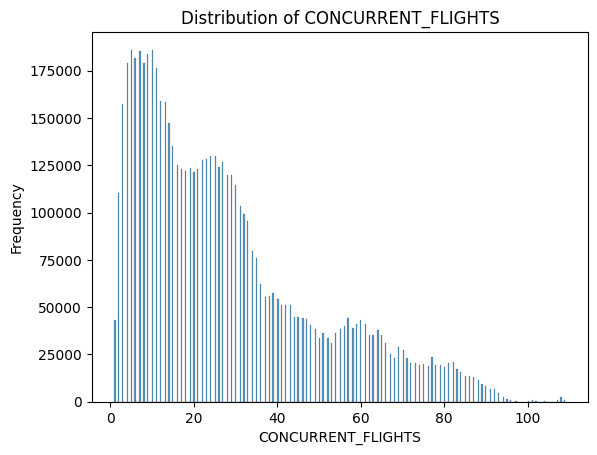

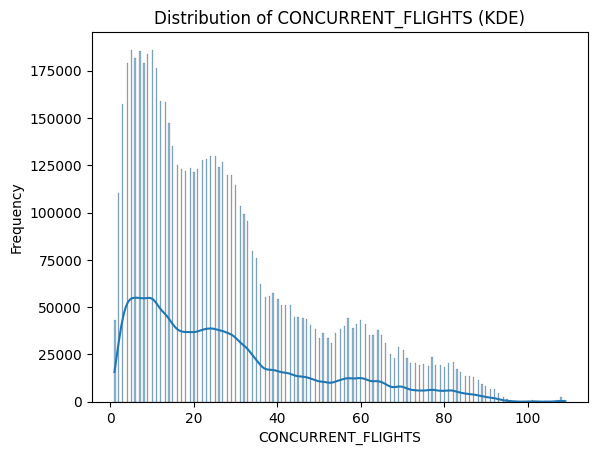

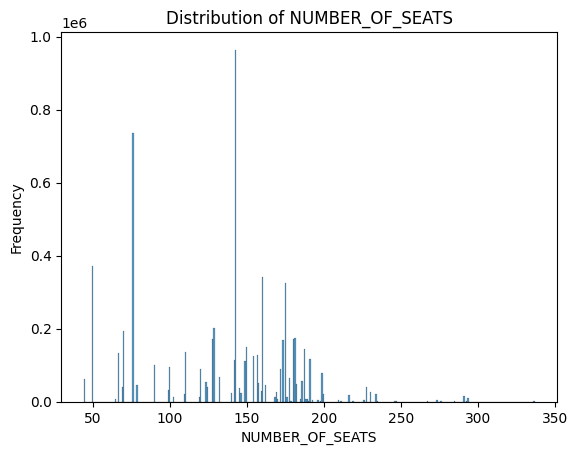

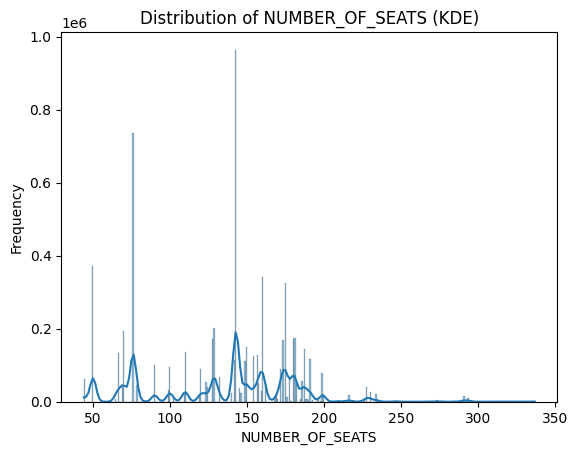

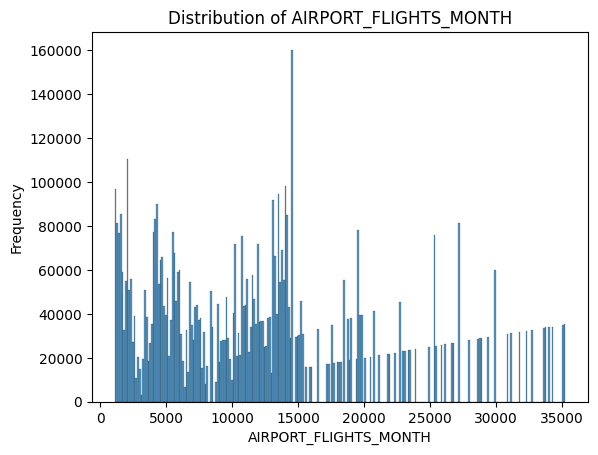

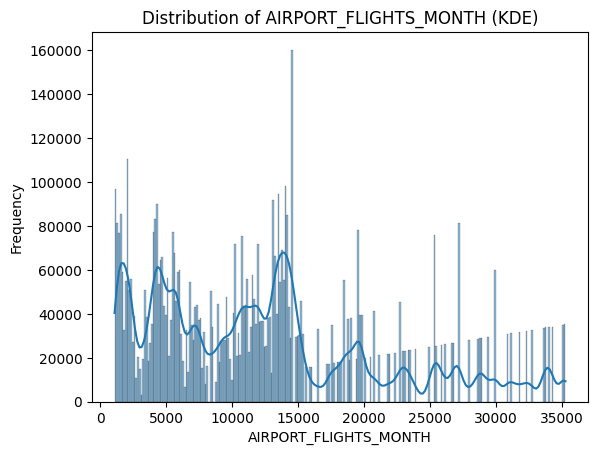

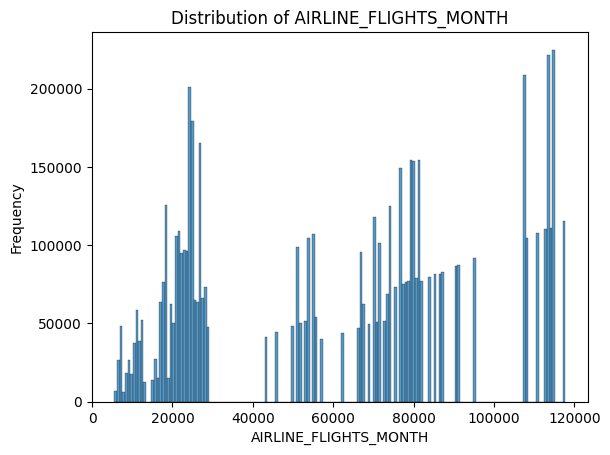

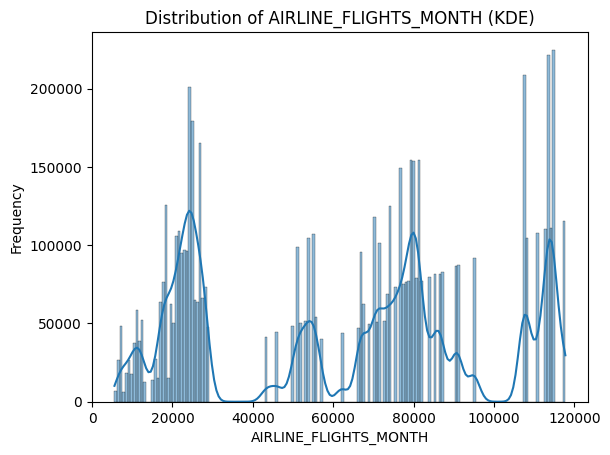

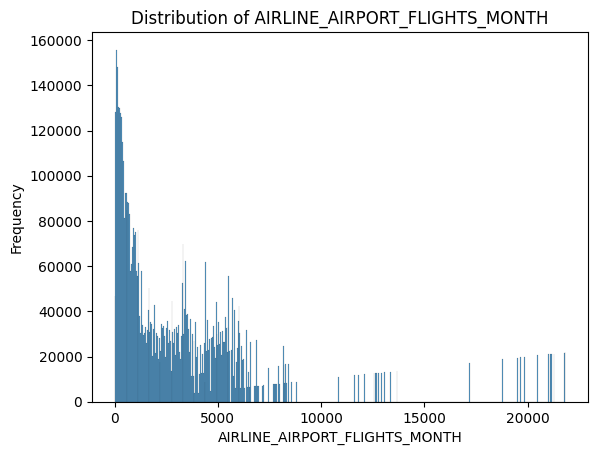

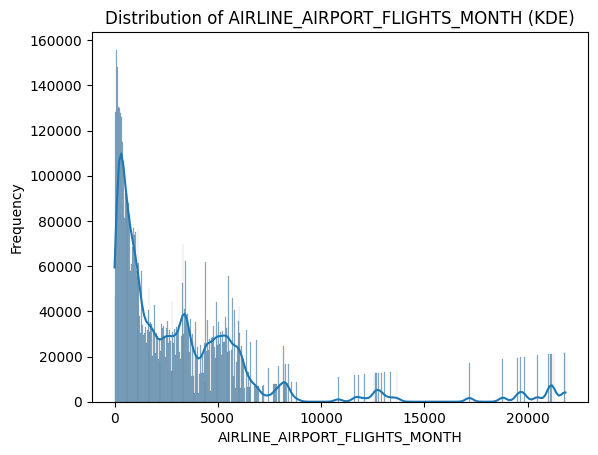

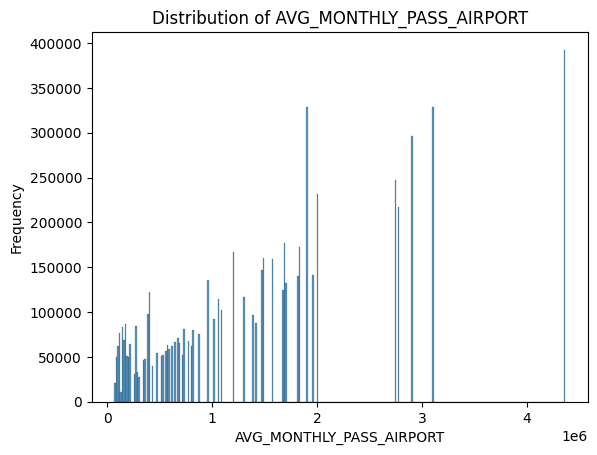

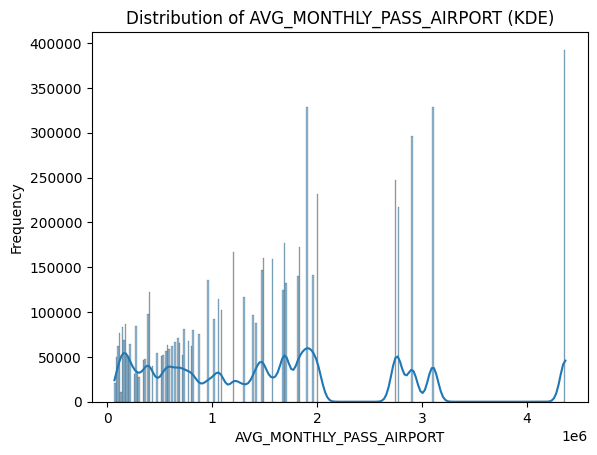

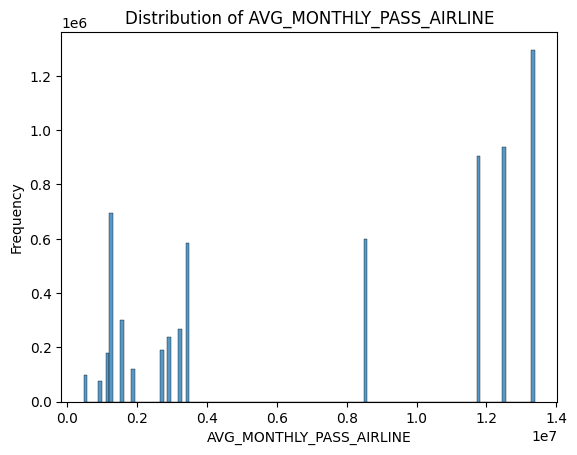

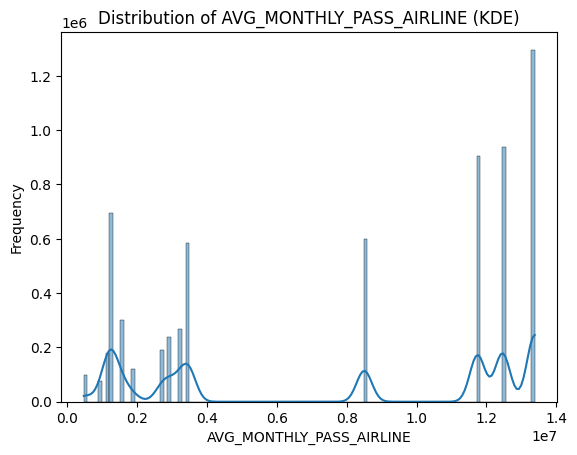

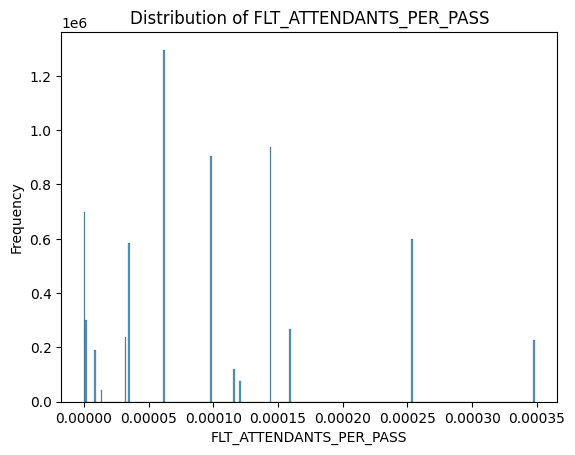

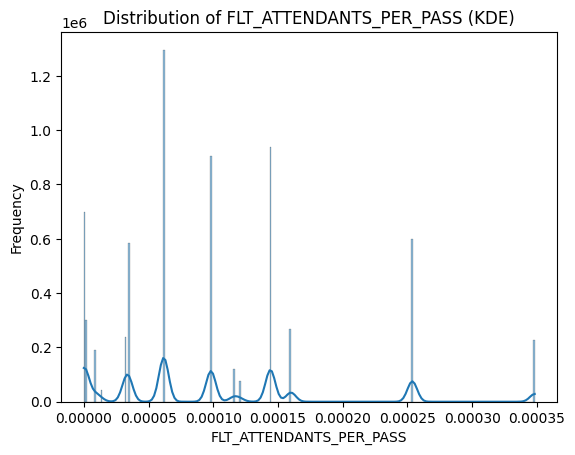

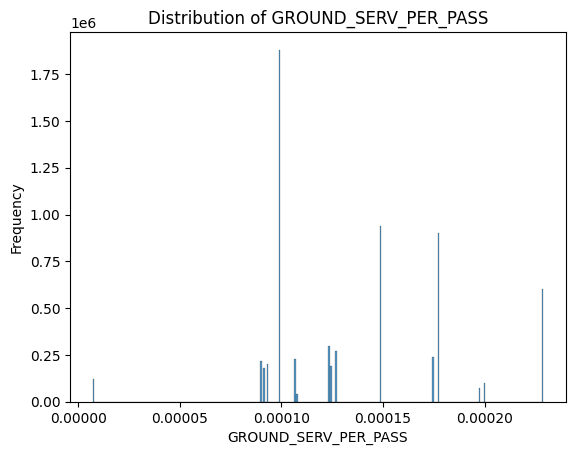

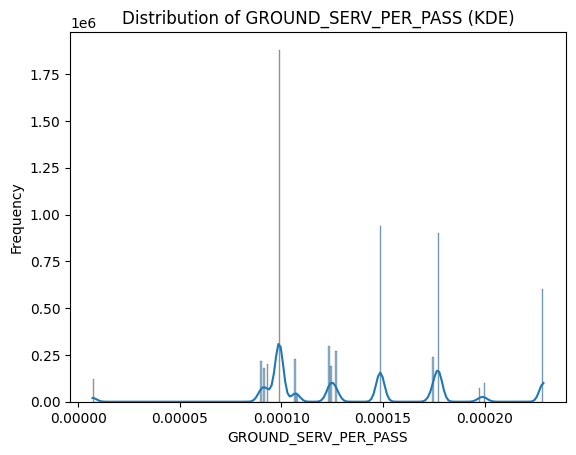

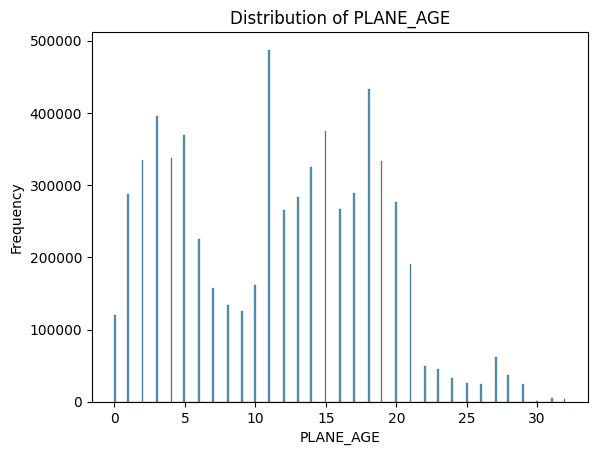

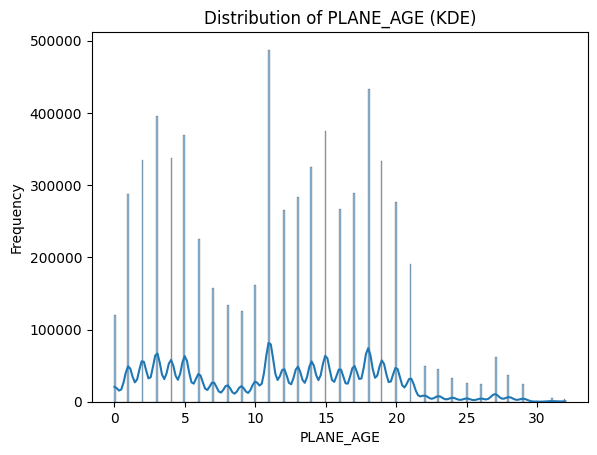

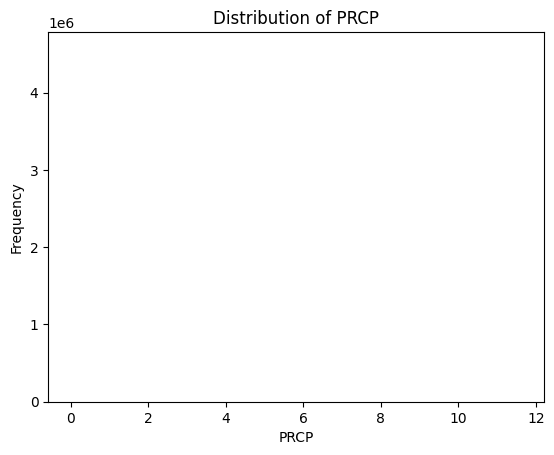

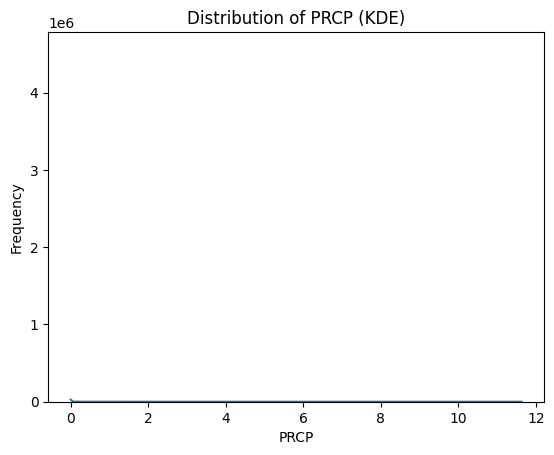

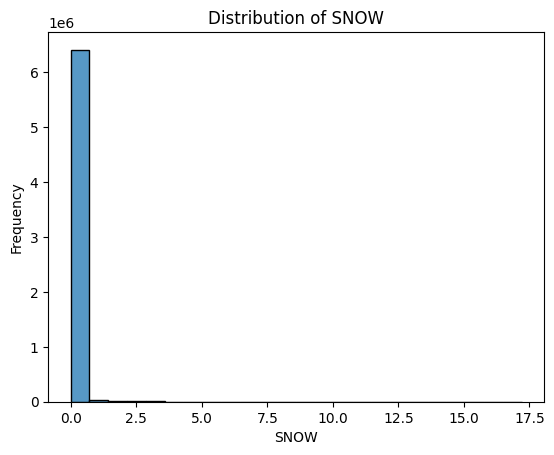

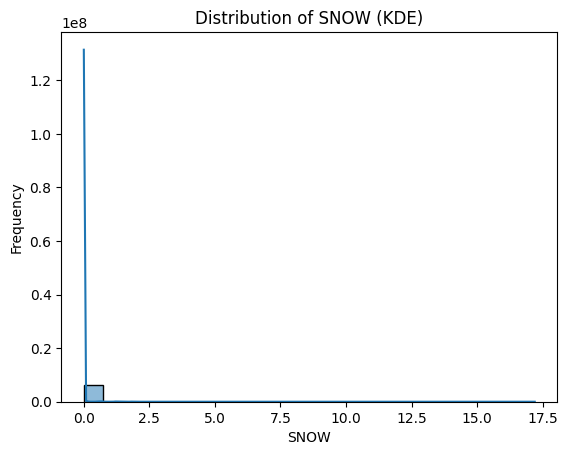

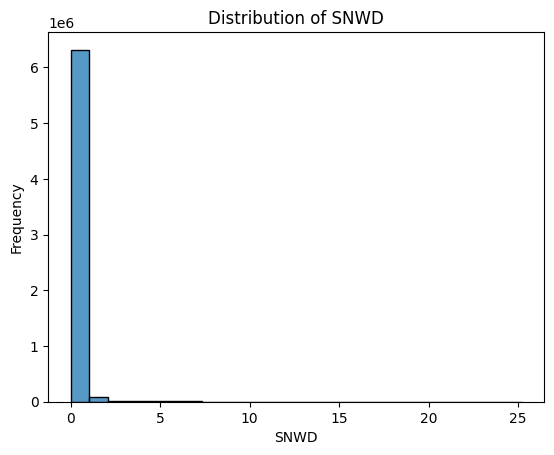

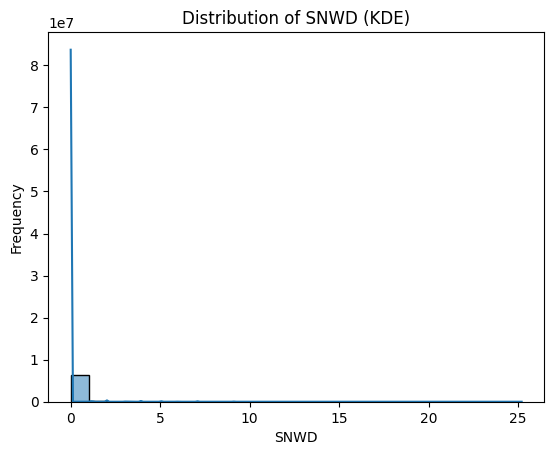

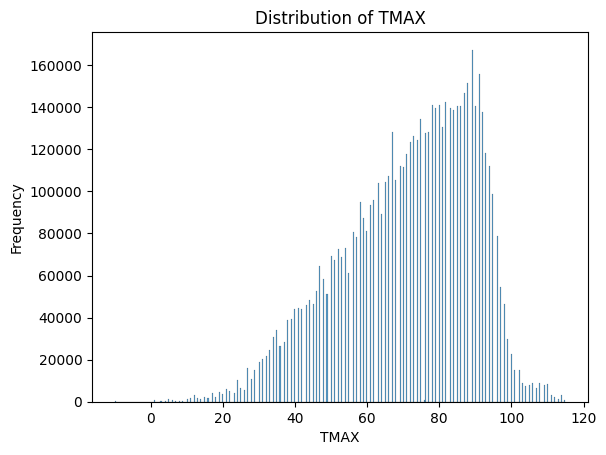

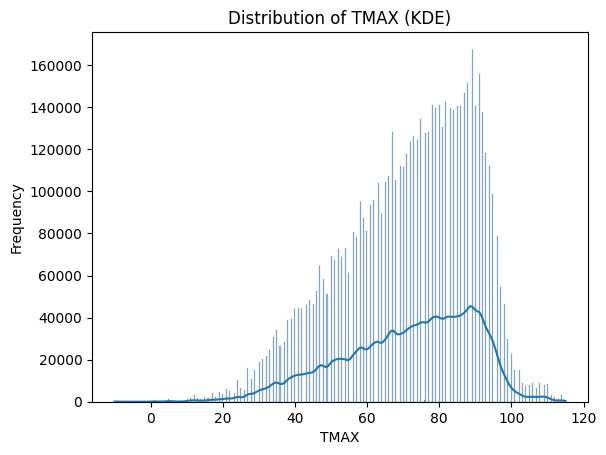

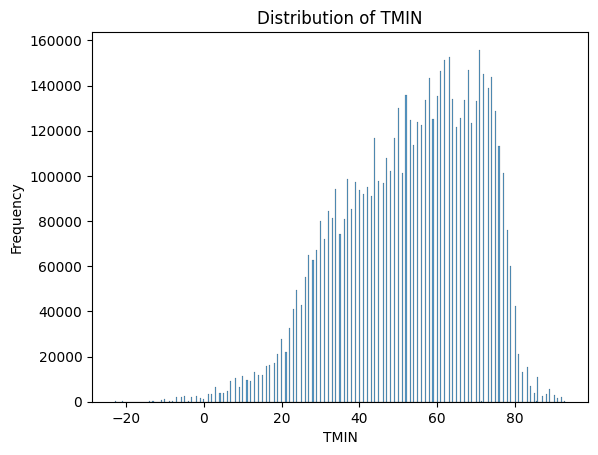

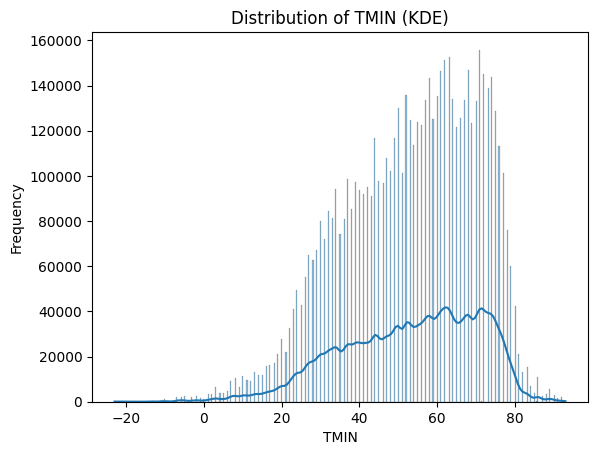

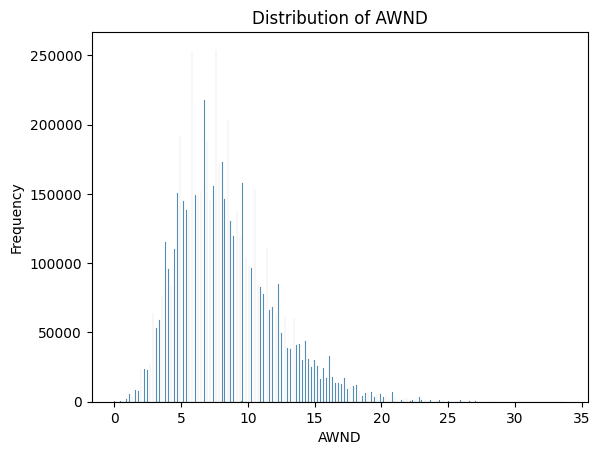

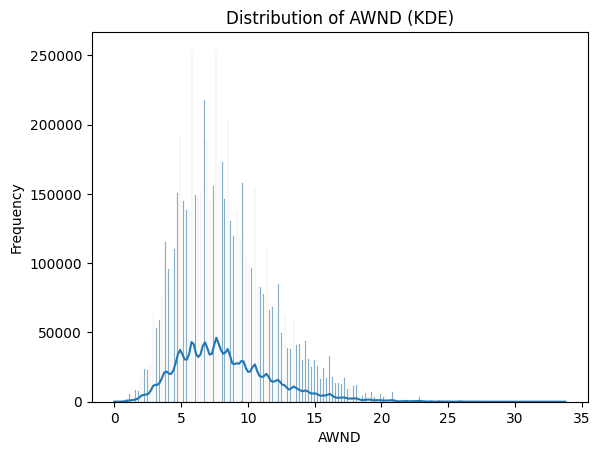

In [ ]:
columns_to_plot = ['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
    'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
    'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
    'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
    'GROUND_SERV_PER_PASS', 'PLANE_AGE',
    'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND']
for col in columns_to_plot:
  plot_histogram(df, col)

## Count Num of Positive Examples For Different Delay Thresholds

In [ ]:
thresholds = np.arange(0, 35, step=5)
for threshold in thresholds:
  print(f"Threshold: {threshold}")
  print(f"Number of positive examples: {len(df[df['DEP_DELAY_NEW'] > threshold]):,}")

Threshold: 0
Number of positive examples: 2,172,146
Threshold: 5
Number of positive examples: 1,614,034
Threshold: 10
Number of positive examples: 1,284,169
Threshold: 15
Number of positive examples: 1,055,553
Threshold: 20
Number of positive examples: 886,030
Threshold: 25
Number of positive examples: 755,003
Threshold: 30
Number of positive examples: 648,493


## Run Distribution Analysis

In [20]:
def get_threshold_groups(df, thresholds, target_col='DEP_DELAY_NEW'):
    threshold_groups = {}
    for thresh in thresholds:
      # Group 2: Small Delays (The specific slice we are investigating)

      small = df[df[target_col] < thresh]

      # Group 3: Large Delays (The hurdle overflow)
      large = df[df[target_col] >= thresh]
      threshold_groups[thresh] = (small, large)

    return threshold_groups



def analyze_threshold_impact(df, feature, zero_group, threshold_groups, target_col='DEP_DELAY_NEW', xlim = None, categorical=False, kde=True):

    """
    Visualizes the distribution of a feature for three groups:
    1. Strict Zeros (Baseline)
    2. Small Delays (0 < y < Threshold) -> The group we want to verify looks like Zeros
    3. Large Delays (y >= Threshold)
    """
    # "Strict Zero" group is constant across all thresholds

    # Create a row of plots for this feature, one column per threshold

    n_thresh = len(threshold_groups)
    fig, axes = plt.subplots(1, n_thresh, figsize=(5 * n_thresh, 5), sharey=True)

    # Handle case where there is only one threshold (axes is not a list)

    if n_thresh == 1: axes = [axes]

    for i, thresh in tqdm(enumerate(threshold_groups)):

      ax = axes[i]
      # Retrieve pre-calculated groups
      small_delay_group, large_delay_group = threshold_groups[thresh]
      if categorical:
        # --- CATEGORICAL: NORMALIZED HISTOGRAM ---
        # We use stat='probability' to normalize heights so groups of diff sizes are comparable.
        # discrete=True ensures bars are centered on categories.
        # element='step' or 'poly' allows overlap visibility better than filled bars.

        # 1. Plot Baseline (Zeros)

        sns.histplot(data=zero_group, x=feature, ax=ax, color='black',
                     stat='probability', element='step', fill=False,
                     linestyle='--', label='Strict Zeros (0)', common_norm=False)

        # 2. Plot Small Delays
        if len(small_delay_group) > 0:
          sns.histplot(data=small_delay_group, x=feature, ax=ax, color='blue',
                       stat='probability', element='step', fill=True, alpha=0.1,
                       label=f"'On-time' [0-{thresh})", common_norm=False)

        # 3. Plot Large Delays
        if len(large_delay_group) > 0:
          sns.histplot(data=large_delay_group, x=feature, ax=ax, color='red',
                       stat='probability', element='step', fill=False,
                       label=f'Large Delay (>={thresh})', common_norm=False)
        # Rotate x-labels for categorical if there are many categories

        if zero_group[feature].nunique() > 5:

          ax.tick_params(axis='x', rotation=45)

      else:
        # --- PLOTTING ---

        # We use common_norm=False because the Zero group is huge compared to Small Delays.
        # 1. Plot Baseline (Zeros) - Grey/Black
        sns.kdeplot(data=zero_group, x=feature, ax=ax, color='black',
                    linestyle='--', label='Strict Zeros (0)', common_norm=False,
                    fill=False)

        # 2. Plot Small Delays - Blue (The Hypothesis Test)
        if len(small_delay_group) > 10: # Only plot if data exists
          sns.kdeplot(data=small_delay_group, x=feature, ax=ax, color='blue',
                      fill=True, alpha=0.1, label=f"'On-time' [0-{thresh})",
                      common_norm=False)

        # 3. Plot Large Delays - Red (The Contrast)
        if len(large_delay_group) > 10:
          sns.kdeplot(data=large_delay_group, x=feature, ax=ax, color='red',
                      label=f'Large Delay (>={thresh})', common_norm=False)


      ax.set_title(f"Feature: {feature}, Thresh: {thresh} min\n('On-time' N={len(small_delay_group):,})")
      ax.set_xlabel(feature)
      ax.legend()
      if xlim:
        ax.set_xlim(xmin=xlim[0], xmax=xlim[1])

    plt.tight_layout()
    plt.show()

#### Thresh = 15

In [15]:
# --- EXECUTION ---

# 1. Load your data
df = df

# 2. Define your settings:

thresh_sweep = [15]

# Select the most "physical" features where operational variance implies physical similarity
# features_to_check = ['AWND', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'SEGMENT_NUMBER', 'CARRIER_NAME']
threshold_groups = get_threshold_groups(df, thresh_sweep)
zero_group = df[df['DEP_DELAY_NEW'] == 0]

3it [00:00, 13.79it/s]


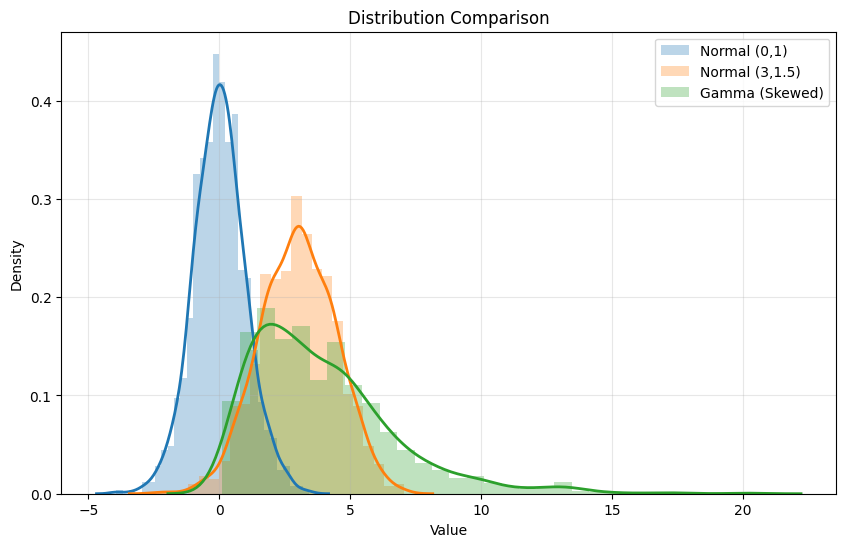

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def compare_distributions(datasets, labels=None, title='Distribution Comparison', xlim=None):
    """
    Plots multiple distributions overlaid on each other.

    Parameters:
    - datasets: A list of arrays/lists (e.g. [data1, data2, data3]).
    - labels: A list of strings for the legend. If None, auto-generates 'Set 1', 'Set 2'...
    - title: String for the plot title.
    """
    plt.figure(figsize=(10, 6))

    # 1. Handle Labels: If no labels provided, create default ones (Set 1, Set 2...)
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(datasets))]

    # 2. Generate Colors: Create a distinct color for each dataset
    colors = sns.color_palette('tab10', n_colors=len(datasets))

    # 3. Iterate and Plot
    for i, data in tqdm(enumerate(datasets)):
        # Histogram
        plt.hist(data, bins='auto', alpha=0.3, density=True,
                 label=labels[i], color=colors[i], edgecolor=None)

        # KDE Line (using the same color)
        sns.kdeplot(data, color=colors[i], linewidth=2, warn_singular=True)

    if xlim:
      plt.xlim(xlim)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- Example Usage with 3 Datasets ---
d1 = np.random.normal(0, 1, 1000)      # Standard Normal
d2 = np.random.normal(3, 1.5, 1000)    # Shifted/Wider
d3 = np.random.gamma(2, 2, 1000)       # Skewed (Gamma distribution)

# Pass them as a list
data_list = [d1, d2, d3]
label_list = ['Normal (0,1)', 'Normal (3,1.5)', 'Gamma (Skewed)']

compare_distributions(data_list, labels=label_list)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def compare_zero_inflated(datasets, labels=None, title='Distribution Comparison', xlim=None):
    """
    Splits the visualization into two parts:
    1. A bar chart showing the % of Zeros (e.g., No Rain).
    2. A density plot of ONLY the Non-Zero values (e.g., Amount of Rain).
    """
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(datasets))]

    colors = sns.color_palette('tab10', n_colors=len(datasets))

    # Create a subplot with 2 columns: Left for Zeros, Right for Distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 3]})

    # --- Plot 1: The "Hurdle" (Percentage of Zeros) ---
    zero_counts = [np.mean(d == 0) * 100 for d in datasets]
    axes[0].bar(labels, zero_counts, color=colors, alpha=0.7)
    axes[0].set_ylabel('Percent of Data that is Zero (%)')
    axes[0].set_title('Zero-Inflation Rate')
    axes[0].grid(axis='y', alpha=0.3)
    # Rotate labels if they are long
    axes[0].tick_params(axis='x', rotation=45)

    # --- Plot 2: The Distribution (Non-Zeros Only) ---
    for i, data in enumerate(datasets):
        # Filter for strictly positive values
        nonzero_data = data[data > 0]

        if len(nonzero_data) > 0:
            # Histogram
            axes[1].hist(nonzero_data, bins=30, alpha=0.3, density=True,
                         color=colors[i], label=labels[i])
            # KDE
            # 'cut=0' stops the KDE from extending past the data range (prevents negative rain)
            sns.kdeplot(nonzero_data, color=colors[i], linewidth=2, ax=axes[1], cut=0)

    if xlim:
      axes[1].set_xlim(xlim)
    axes[1].set_title(f'{title} (Non-Zero Only)')
    axes[1].set_xlabel('Value (e.g., Precipitation Amount)')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [27]:
threshold_groups.keys()

dict_keys([15])

##### Continuous Variables

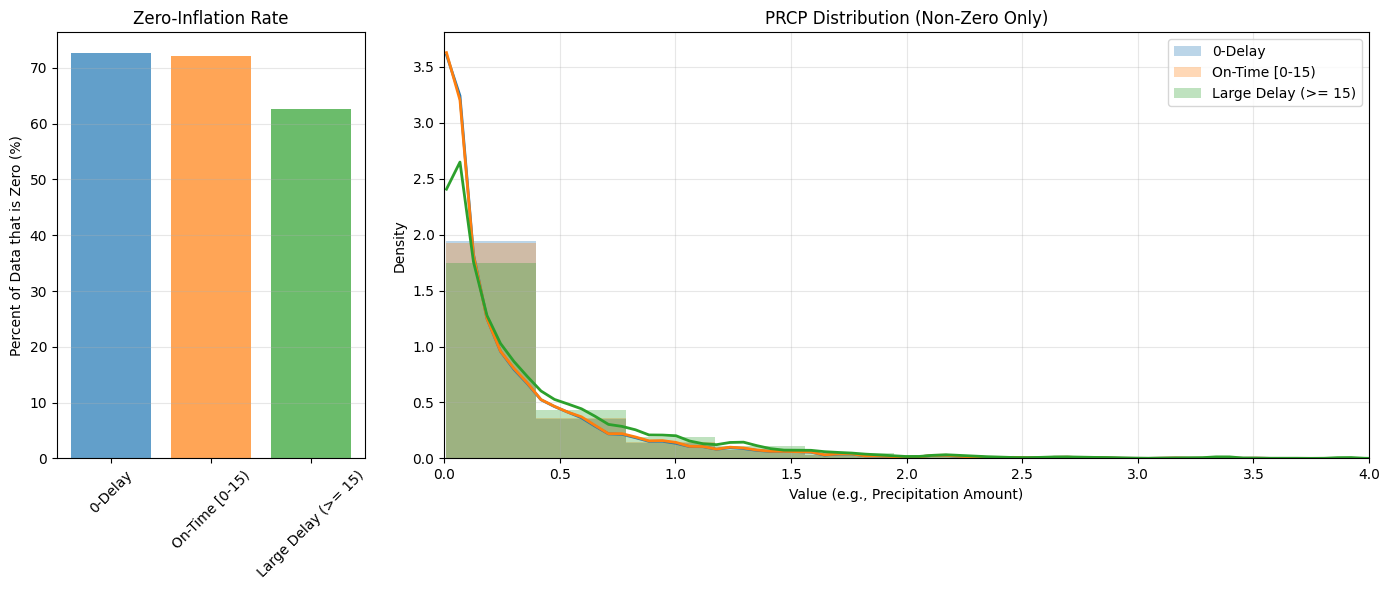

In [64]:
col = 'PRCP'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']

# --- Apply to your specific data ---
# Assuming 'datasets' and 'labels' are already prepared as per your snippet:
compare_zero_inflated(datasets, labels, title="PRCP Distribution", xlim=(0, 4))

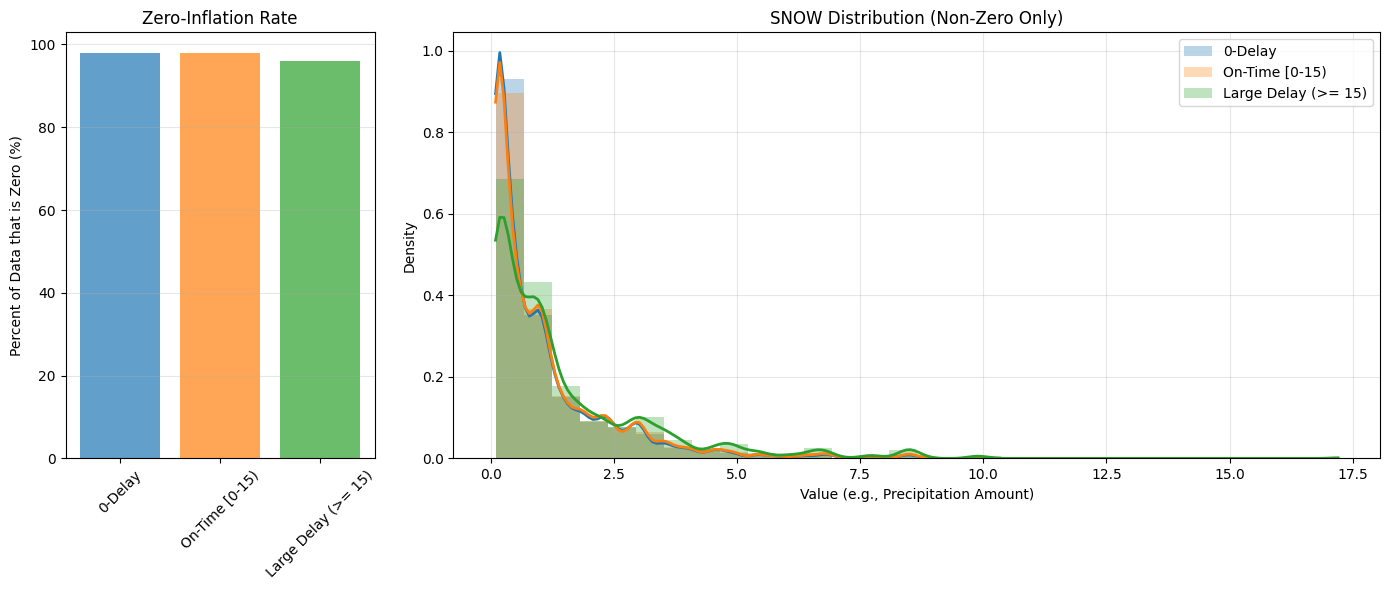

In [62]:
col = 'SNOW'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_zero_inflated(datasets, labels, title="SNOW Distribution")

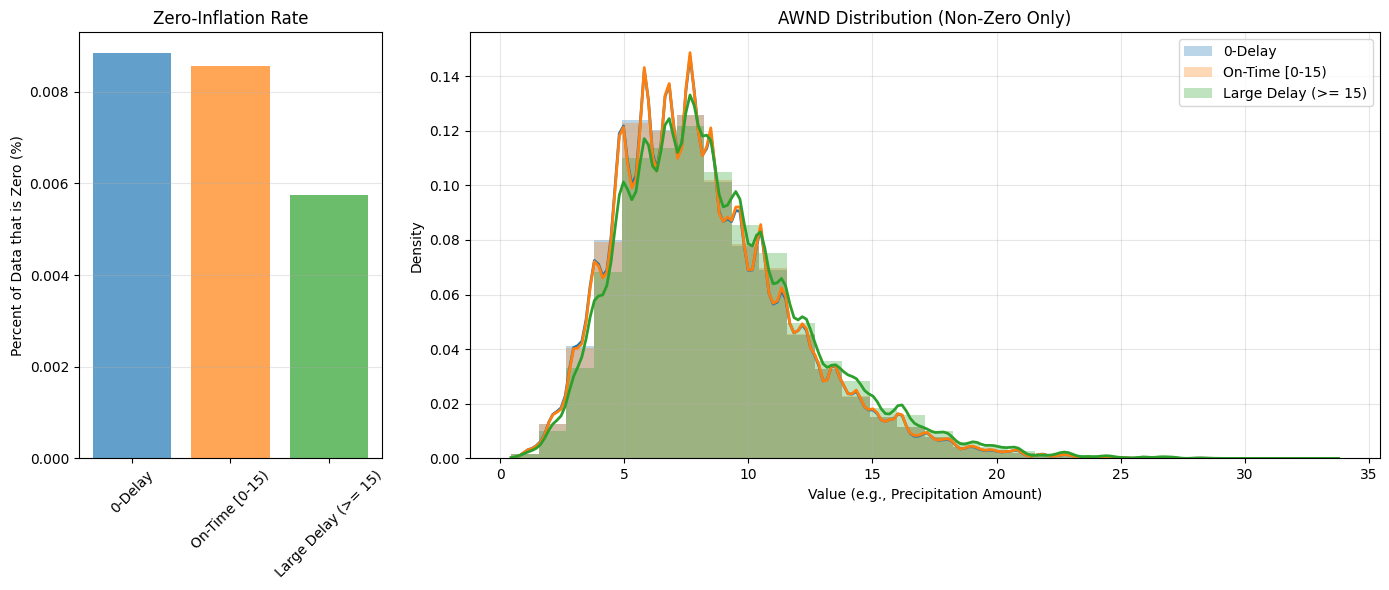

In [60]:
col = 'AWND'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_zero_inflated(datasets, labels, title=f"{col} Distribution")

3it [00:35, 11.95s/it]


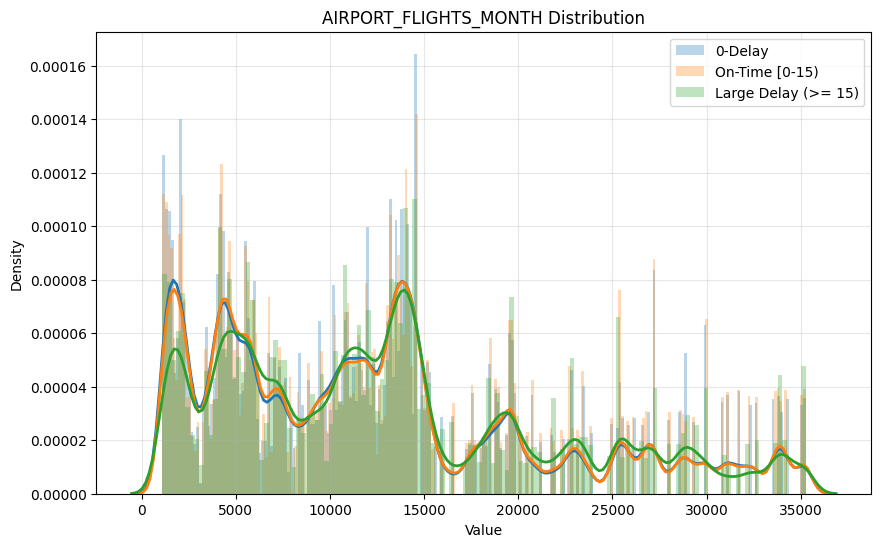

In [66]:
col = 'AIRPORT_FLIGHTS_MONTH'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_distributions(datasets, labels, title=f"{col} Distribution")

##### Discrete Variables

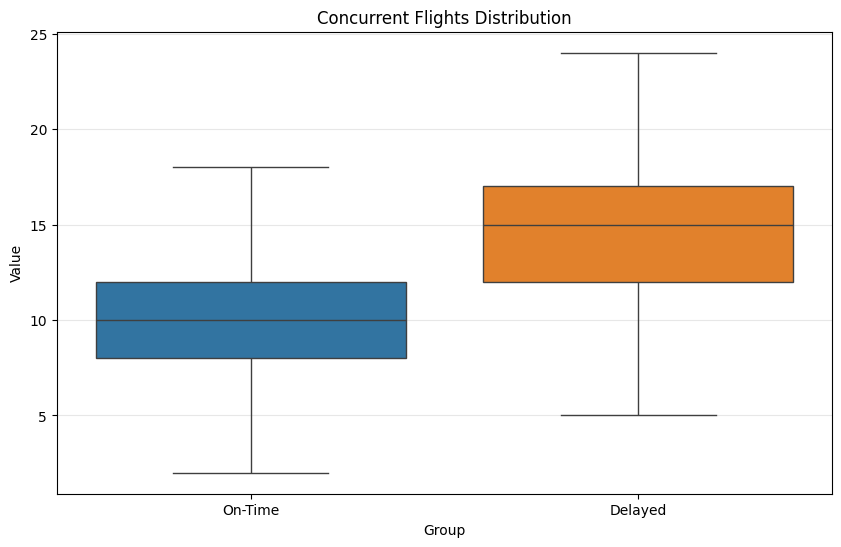

In [77]:
def compare_counts_boxplot(datasets, labels=None, title='Count Distribution Comparison'):
    """
    Compares discrete numerical distributions using Box Plots.
    Best for variables like 'Number of Concurrent Flights'.
    """
    if labels is None:
        labels = [f'Group {i+1}' for i in range(len(datasets))]

    # 1. Combine data into Long Format for Seaborn
    # (Seaborn handles boxplots best when data is in one DataFrame)
    combined_data = []
    for i, data in enumerate(datasets):
        df_temp = pd.DataFrame({'Value': data})
        df_temp['Group'] = labels[i]
        combined_data.append(df_temp)

    df_plot = pd.concat(combined_data, ignore_index=True)

    # 2. Plot
    plt.figure(figsize=(10, 6))

    # Boxplot shows Median, IQR, and Outliers
    sns.boxplot(data=df_plot, x='Group', y='Value', palette='tab10', showfliers=False)

    # Optional: Add a "Strip Plot" on top to see the actual density of dots
    # (Good if you have < 1000 data points, otherwise it gets too crowded)
    # sns.stripplot(data=df_plot, x='Group', y='Value', color='black', alpha=0.2, jitter=True)

    plt.title(title)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# --- Example Usage ---
# Concurrent flights: Maybe delays happen when airports are busier?
concurrent_ontime = np.random.poisson(lam=10, size=1000)   # Avg 10 flights
concurrent_delayed = np.random.poisson(lam=15, size=1000)  # Avg 15 flights

compare_counts_boxplot([concurrent_ontime, concurrent_delayed],
                       labels=['On-Time', 'Delayed'],
                       title="Concurrent Flights Distribution")

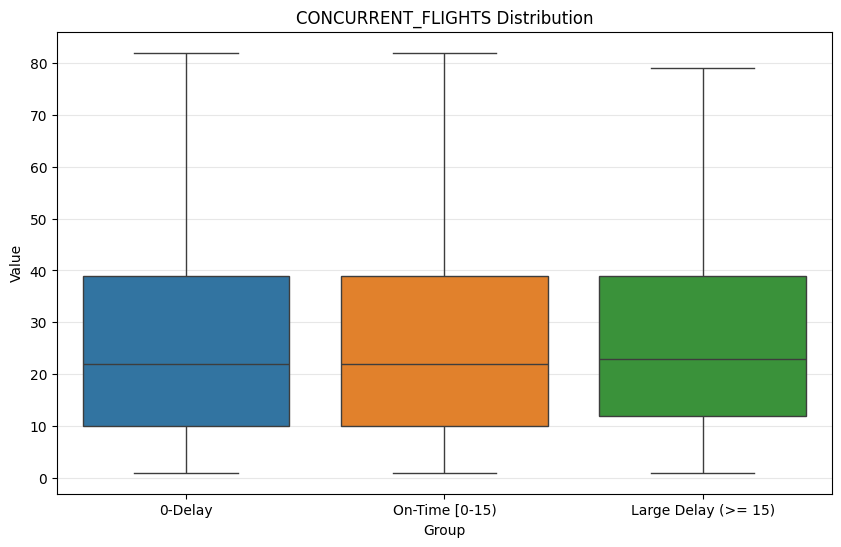

In [78]:
col = 'CONCURRENT_FLIGHTS'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_counts_boxplot(datasets, labels, title=f"{col} Distribution")

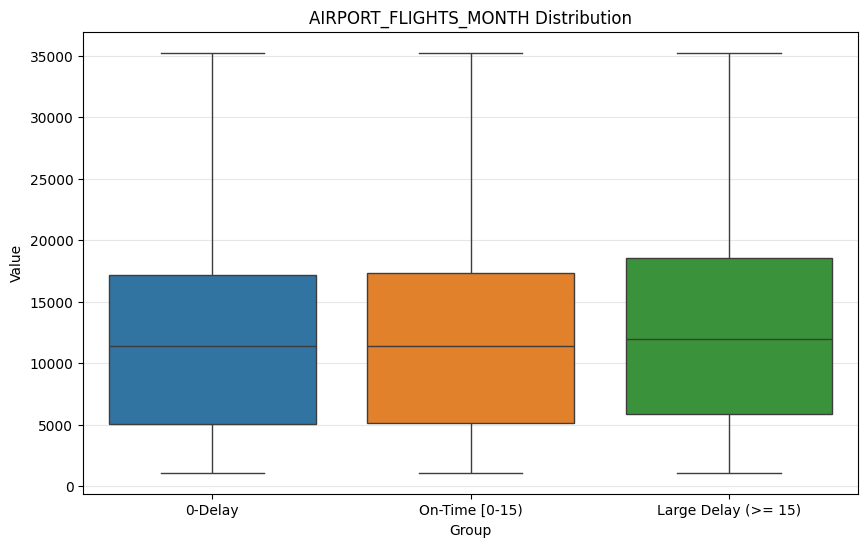

In [79]:
col = 'AIRPORT_FLIGHTS_MONTH'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_counts_boxplot(datasets, labels, title=f"{col} Distribution")

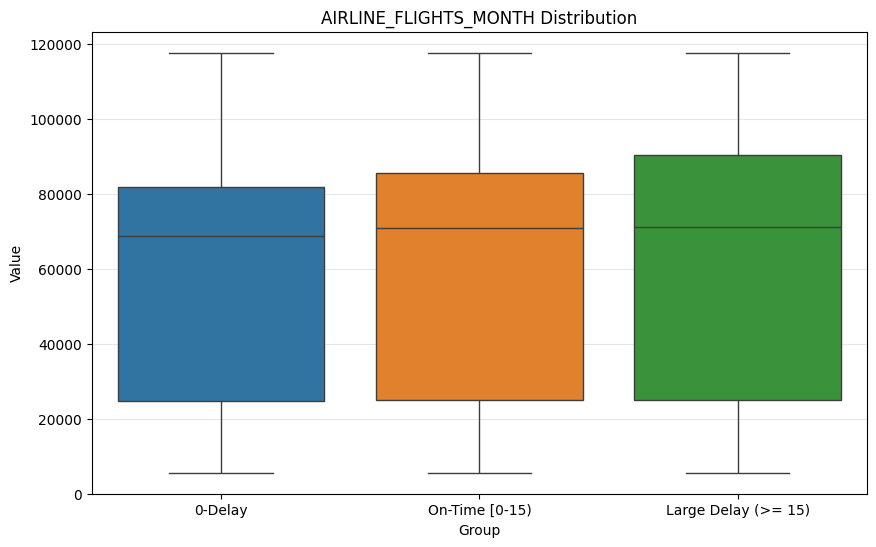

In [82]:
col = 'AIRLINE_FLIGHTS_MONTH'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_counts_boxplot(datasets, labels, title=f"{col} Distribution")

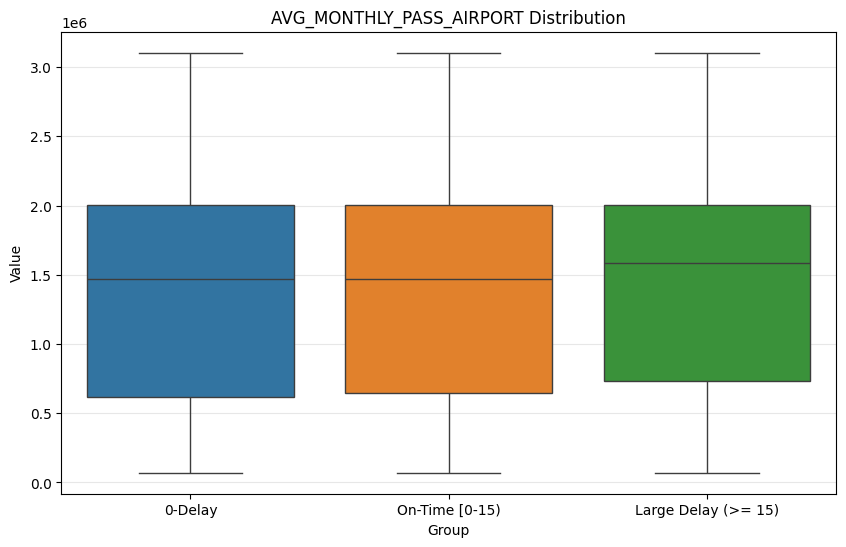

In [81]:
col = 'AVG_MONTHLY_PASS_AIRPORT'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_counts_boxplot(datasets, labels, title=f"{col} Distribution")

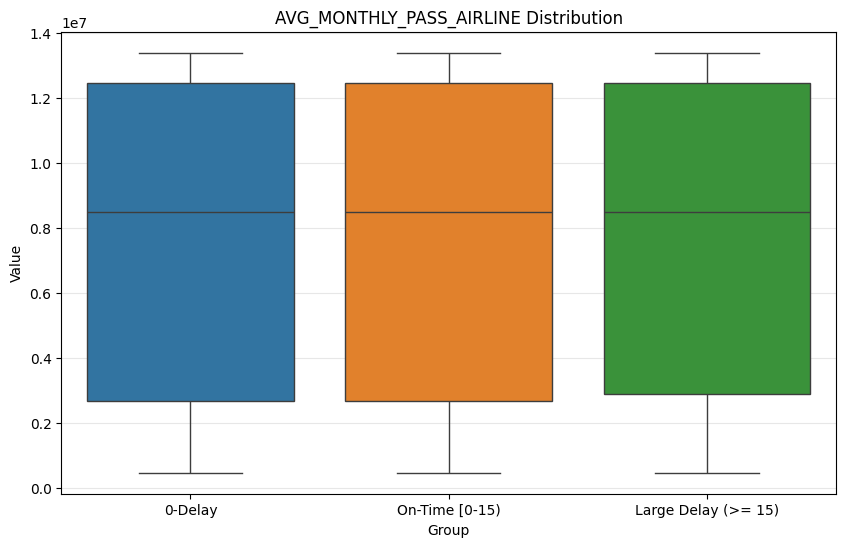

In [83]:
col = 'AVG_MONTHLY_PASS_AIRLINE'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_counts_boxplot(datasets, labels, title=f"{col} Distribution")

##### Categorical Variables

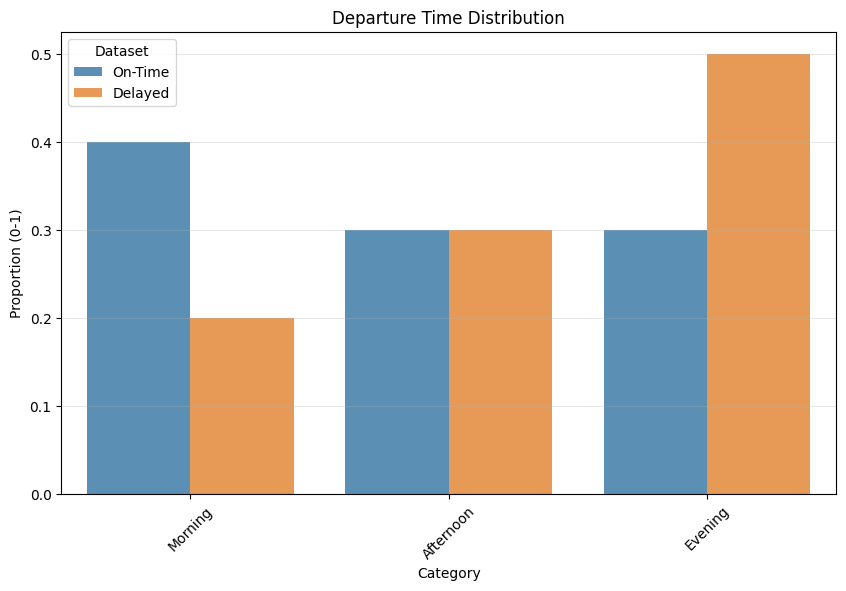

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_categorical(datasets, labels=None, title='Categorical Comparison', order=None):
    """
    Compares categorical variables using a Grouped Bar Chart (Percentages).

    Parameters:
    - datasets: List of lists/arrays/Series containing categorical data.
    - labels: List of names for the groups (e.g., ['0-Delay', 'Large Delay']).
    - order: Optional list to enforce order of categories on X-axis (e.g., ['Morning', 'Noon', 'Night']).
    """
    if labels is None:
        labels = [f'Group {i+1}' for i in range(len(datasets))]

    # 1. Convert inputs into a single DataFrame for Seaborn
    combined_data = []
    for i, data in enumerate(datasets):
        # Convert to Series to easily calculate value_counts with normalization
        series = pd.Series(data, name='Category')
        counts = series.value_counts(normalize=True).reset_index()
        counts.columns = ['Category', 'Percentage']
        counts['Group'] = labels[i]
        combined_data.append(counts)

    df_plot = pd.concat(combined_data, ignore_index=True)

    # 2. Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_plot, x='Category', y='Percentage', hue='Group',
                order=order, palette='tab10', alpha=0.8)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel('Proportion (0-1)')
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Dataset')
    plt.show()

# --- Example Usage ---
# Time blocks for on-time vs delayed flights
time_ontime = ['Morning'] * 400 + ['Afternoon'] * 300 + ['Evening'] * 300
time_delayed = ['Morning'] * 200 + ['Afternoon'] * 300 + ['Evening'] * 500

compare_categorical([time_ontime, time_delayed],
                    labels=['On-Time', 'Delayed'],
                    title="Departure Time Distribution",
                    order=['Morning', 'Afternoon', 'Evening']) # Enforce logical order

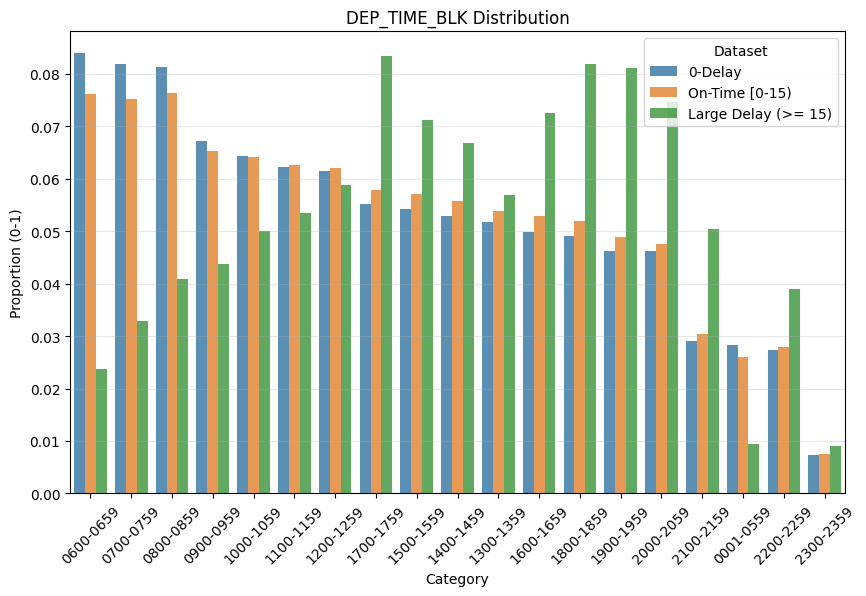

In [71]:
col = 'DEP_TIME_BLK'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_categorical(datasets, labels, title=f"{col} Distribution")

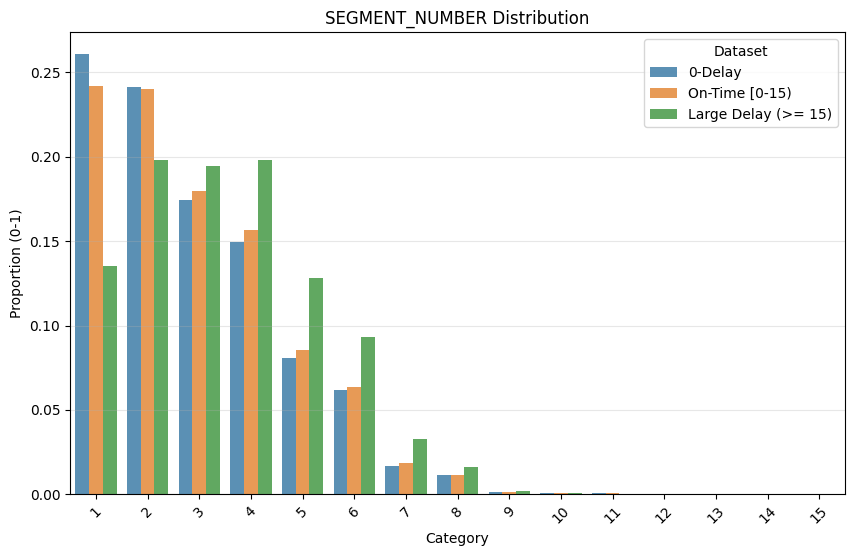

In [72]:
col = 'SEGMENT_NUMBER'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_categorical(datasets, labels, title=f"{col} Distribution")

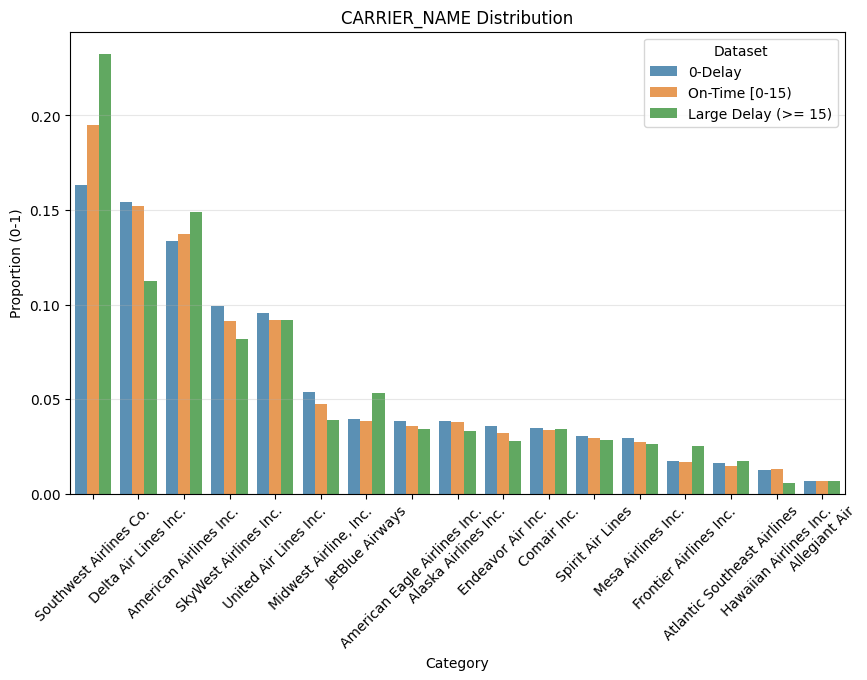

In [73]:
col = 'CARRIER_NAME'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_categorical(datasets, labels, title=f"{col} Distribution")

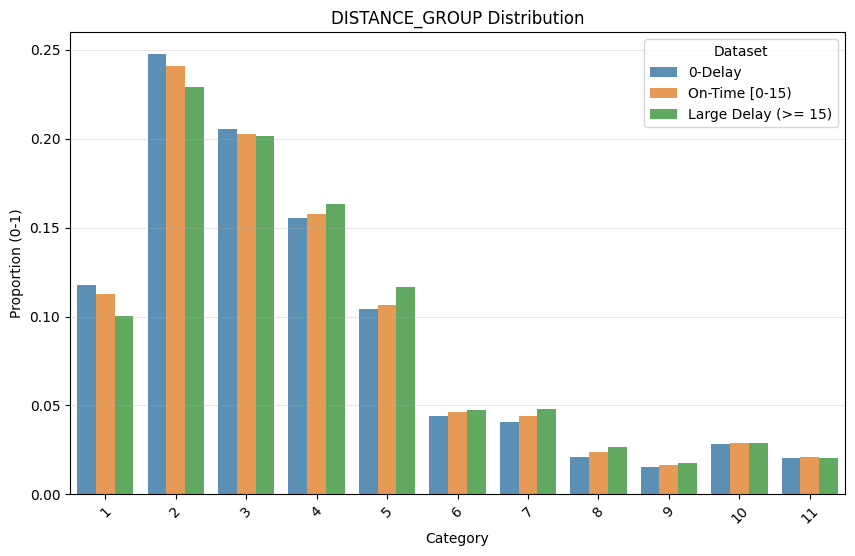

In [80]:
col = 'DISTANCE_GROUP'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_categorical(datasets, labels, title=f"{col} Distribution")

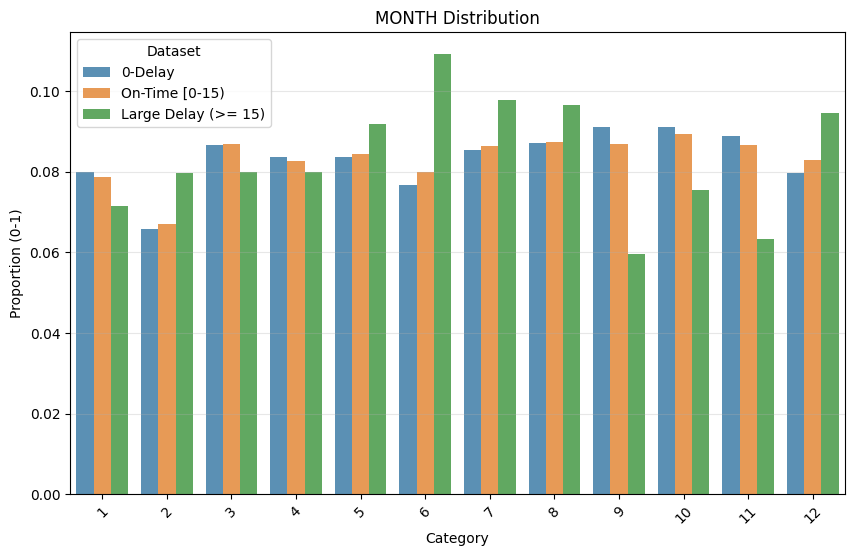

In [74]:
col = 'MONTH'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_categorical(datasets, labels, title=f"{col} Distribution")

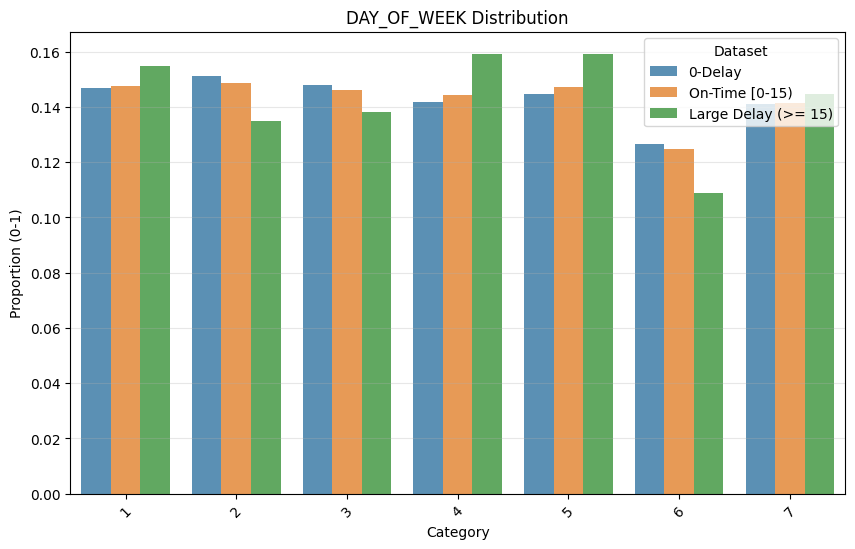

In [76]:
col = 'DAY_OF_WEEK'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
compare_categorical(datasets, labels, title=f"{col} Distribution")

#### Thresh Sweep = [5, 10, 15]

In [ ]:
# --- EXECUTION ---

# 1. Load your data
df = df

# 2. Define your settings:

thresh_sweep = [5, 10, 15]

# Select the most "physical" features where operational variance implies physical similarity
# features_to_check = ['AWND', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'SEGMENT_NUMBER', 'CARRIER_NAME']
threshold_groups = get_threshold_groups(df, thresh_sweep)
zero_group = df[df['DEP_DELAY_NEW'] == 0]

3it [02:16, 45.58s/it]


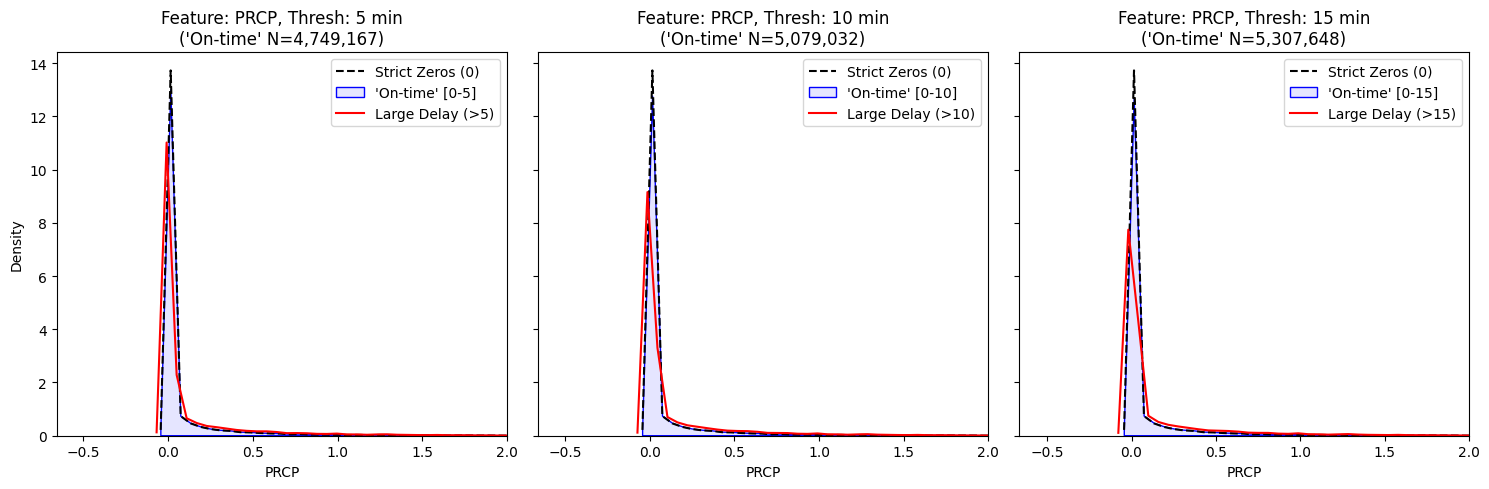

In [ ]:
analyze_threshold_impact(df, 'PRCP', zero_group=zero_group, threshold_groups=threshold_groups, xlim=(None, 2))

In [ ]:
# analyze_threshold_impact(df, 'SNOW', zero_group=zero_group, threshold_groups=threshold_groups, xlim=(None, 1))

In [ ]:
# analyze_threshold_impact(df, 'SNWD', zero_group=zero_group, threshold_groups=threshold_groups, xlim=(None, 3))

3it [00:05,  1.95s/it]


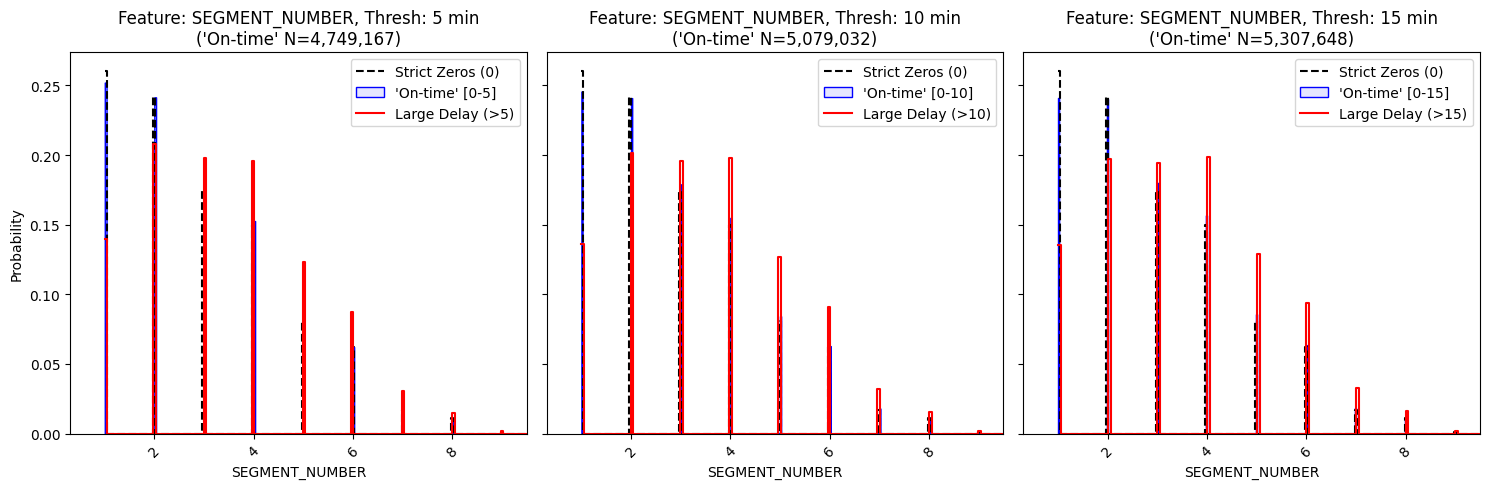

In [ ]:
analyze_threshold_impact(df, 'SEGMENT_NUMBER', zero_group=zero_group, threshold_groups=threshold_groups, xlim=(None, 9.5), categorical=True)

3it [02:04, 41.43s/it]


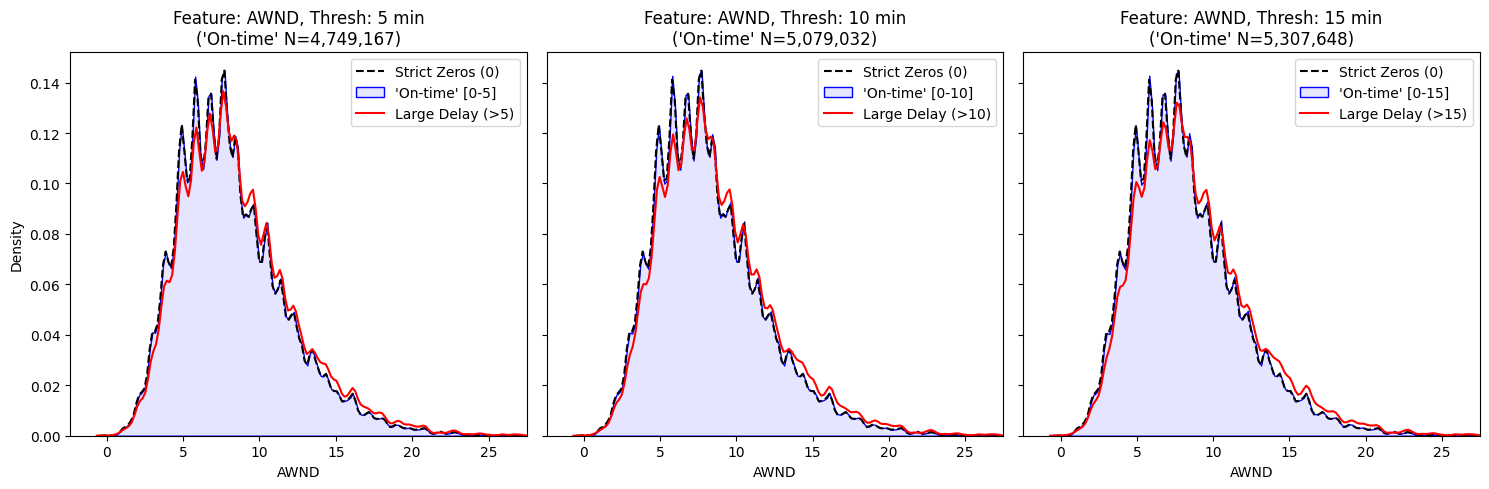

In [ ]:
analyze_threshold_impact(df, 'AWND', zero_group=zero_group, threshold_groups=threshold_groups, xlim=(None, 27.5))

In [ ]:
# analyze_threshold_impact(df, 'CARRIER_NAME', zero_group=zero_group, threshold_groups=threshold_groups, categorical=True)

In [ ]:
# analyze_threshold_impact(df, 'MONTH', zero_group=zero_group, threshold_groups=threshold_groups, categorical=True)

In [ ]:
# analyze_threshold_impact(df, 'DAY_OF_WEEK', zero_group=zero_group, threshold_groups=threshold_groups, categorical=True)

3it [01:51, 37.16s/it]


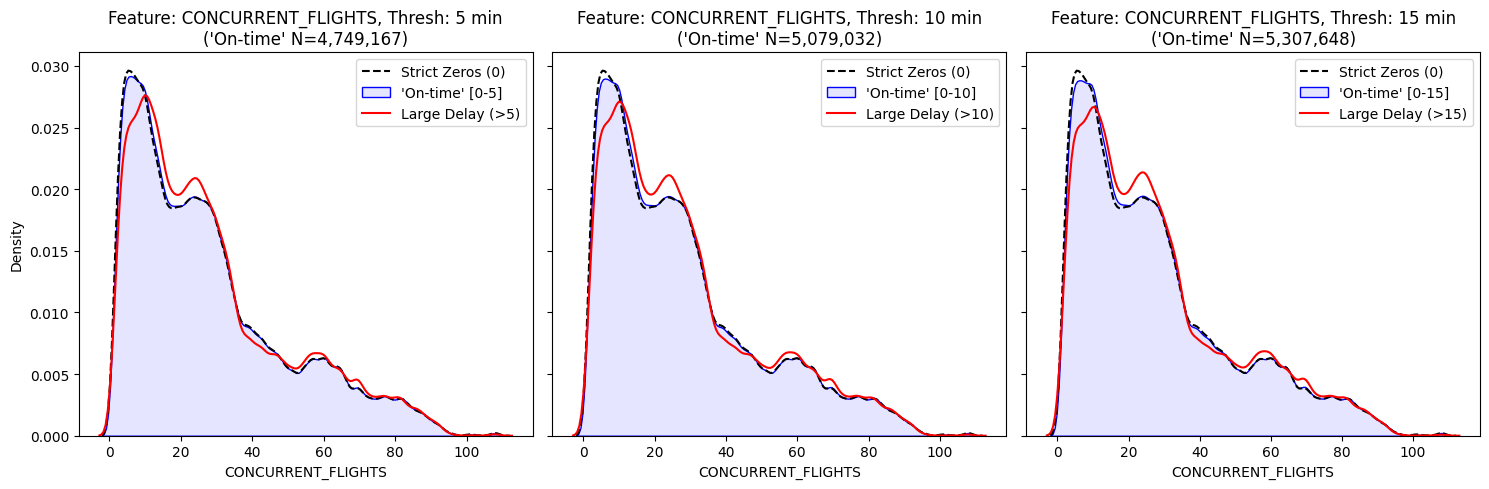

In [ ]:
analyze_threshold_impact(df, 'CONCURRENT_FLIGHTS', zero_group=zero_group, threshold_groups=threshold_groups)

3it [01:44, 34.91s/it]


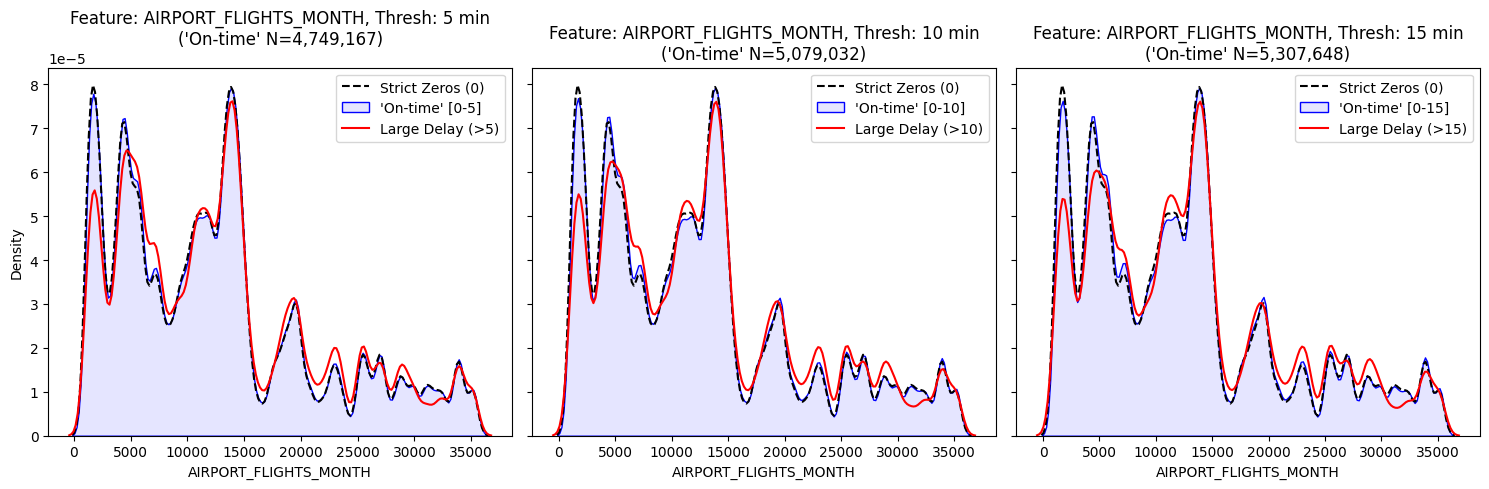

In [ ]:
analyze_threshold_impact(df, 'AIRPORT_FLIGHTS_MONTH', zero_group=zero_group, threshold_groups=threshold_groups)

In [ ]:
analyze_threshold_impact(df, 'DEP_TIME_BLK', zero_group=zero_group, threshold_groups=threshold_groups, categorical=True)

In [ ]:
# analyze_threshold_impact(df, 'CARRIER_DELAY', zero_group=zero_group, threshold_groups=threshold_groups, xlim=(None, 100))

In [ ]:
# analyze_threshold_impact(df, 'WT03', zero_group=zero_group, threshold_groups=threshold_groups, categorical=True)

In [ ]:
# analyze_threshold_impact(df, 'WT08', zero_group=zero_group, threshold_groups=threshold_groups, categorical=True)

In [ ]:
# 3. Run Analysis
# analyze_threshold_impact(df, features_to_check, threshold_groups)

## Conditional Delay | Feature Analysis

In [ ]:
def analyze_conditional_probability(df, feature_cols, target_col='DEP_DELAY_NEW', delay_threshold=15):
    """
    Calculates and plots the conditional probability of a "Significant Delay"
    (Delay > threshold) given specific feature values.

    Parameters:
    - df: DataFrame containing the data
    - feature_cols: List of column names to analyze
    - target_col: The continuous delay column
    - delay_threshold: Minutes to define a "Significant Delay" (default 15)
    """

    # 1. Create the Binary Target for Analysis
    # We define "Delayed" as > threshold (e.g., 15 mins)
    binary_target = f'is_delayed_{delay_threshold}'
    df[binary_target] = (df[target_col] > delay_threshold).astype(int)
    global_mean = df[binary_target].mean()
    print(f"--- Analyzing Probability of Delay > {delay_threshold} min ---")
    print(f"Global Baseline Probability: {df[binary_target].mean():.2%}\n")

    for i in trange(len(feature_cols)):
        feature = feature_cols[i]
        plt.figure(figsize=(10, 6))

        # --- STRATEGY A: Continuous Weather Features (Binning) ---
        if feature in ['PRCP', 'SNOW', 'SNWD']:
            # Create dynamic bins: Zero, Light, Heavy
            # Note: We use a temp column to avoid modifying the original df
            temp_col = f'{feature}_binned'

            # Define bins: 0, 0-0.1 (Light), >0.1 (Heavy/Significant)
            # You can adjust these cutoffs based on domain knowledge
            bins = [-1, 0, 0.5, np.inf]
            labels = ['None (0)', 'Light (0-0.5)', 'Heavy (>0.5)']

            df[temp_col] = pd.cut(df[feature], bins=bins, labels=labels)

            # Plot
            sns.barplot(x=temp_col, y=binary_target, data=df, palette='Blues', capsize=0.1)
            plt.title(f"Probability of Delay (> {delay_threshold}) given {feature} Intensity")
            plt.xlabel(f"{feature} (Inches)")

            # Print stats for report
            print(f"Stats for {feature}:")
            print(df.groupby(temp_col)[binary_target].mean())
            print("-" * 30)

        # --- STRATEGY B: High Cardinality (> 20 Categories) -> HORIZONTAL BAR PLOT ---
        # This is the "Smart" fix for things like CARRIER_NAME
        elif df[feature].nunique() > 20:
            # Sort by highest risk
            order = df.groupby(feature)[binary_target].mean().sort_values(ascending=False).index

            # Take top 20 for readability
            plot_order = order[:20] if len(order) > 20 else order

            # Dynamic Height: Make plot taller if there are many bars
            fig_height = max(6, len(plot_order) * 0.4)
            plt.figure(figsize=(10, fig_height))

            # SWAP X and Y for Horizontal Plot
            sns.barplot(x=binary_target, y=feature, data=df, order=plot_order, capsize=0.1, orient='h')

            plt.title(f"P(Delay) by {feature} (Top {len(plot_order)} Sorted by Risk)")
            plt.xlabel(f"P(Delay > {delay_threshold} min)")
            plt.ylabel(feature)

        # --- STRATEGY C: Standard Categorical -> SMART ROTATION ---
        else:
            plt.figure(figsize=(12, 6)) # Wider figure for time blocks

            # Determine order (Sequential for Time, Sorted for others)
            if 'TIME_BLK' in feature:
                order = sorted(df[feature].unique()) # Keep time sequential
            else:
                order = None # Default

            if 'WT' in feature:
                sns.barplot(x=feature, y=binary_target, data=df, capsize=0.1)
                plt.xticks([0, 1], ['No Event', 'Event Occurred'])
                plt.title(f"Impact of {feature} on P(Delay > {delay_threshold} min)")
            else:
                sns.barplot(x=feature, y=binary_target, data=df, order=order, capsize=0.1)
                plt.title(f"P(Delay > {delay_threshold} min) given {feature}")

            # SMART ROTATION LOGIC
            # If we have > 5 categories, rotate labels to prevent overlap
            if df[feature].nunique() > 5:
                plt.xticks(rotation=45, ha='right')

        # Add global average line for context
        plt.axhline(global_mean, color='red', linestyle='--', label='Global Average')
        plt.legend()
        plt.ylabel(f"P(Delay > {delay_threshold} min)")
        plt.tight_layout()
        plt.show()



--- Analyzing Probability of Delay > 15 min ---
Global Baseline Probability: 16.59%



  0%|          | 0/7 [00:01<?, ?it/s]


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

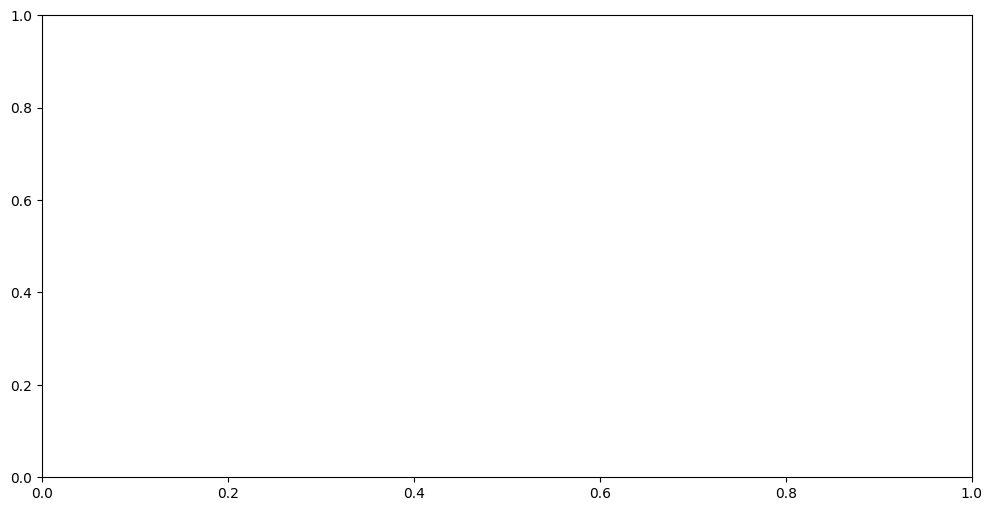

In [ ]:
# --- USAGE EXAMPLE ---

# Select the candidates we identified in the previous turn
candidates = [
    'WT03',          # Thunderstorms (Binary)
    'WT08',          # Smoke/Haze (Binary)
    'SNOW',          # Snowfall (Continuous -> Binned)
    'PRCP',          # Rain (Continuous -> Binned)
    'CARRIER_NAME',  # Airline (High Cardinality Categorical)
    'MONTH',         # Seasonality (Categorical)
    'DEP_TIME_BLK'   # Time of Day (Categorical)
]

# Run the analysis

analyze_conditional_probability(df, candidates)

--- Analyzing Probability of Delay > 5 min ---
Global Baseline Probability: 25.37%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

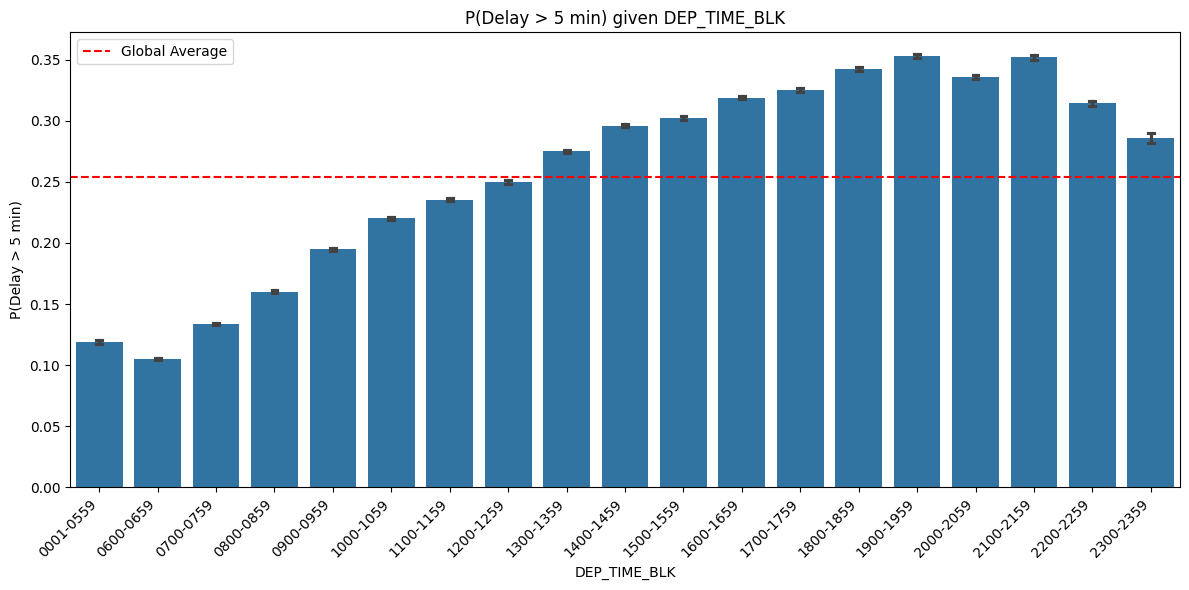

100%|██████████| 1/1 [00:47<00:00, 47.67s/it]


--- Analyzing Probability of Delay > 10 min ---
Global Baseline Probability: 20.18%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

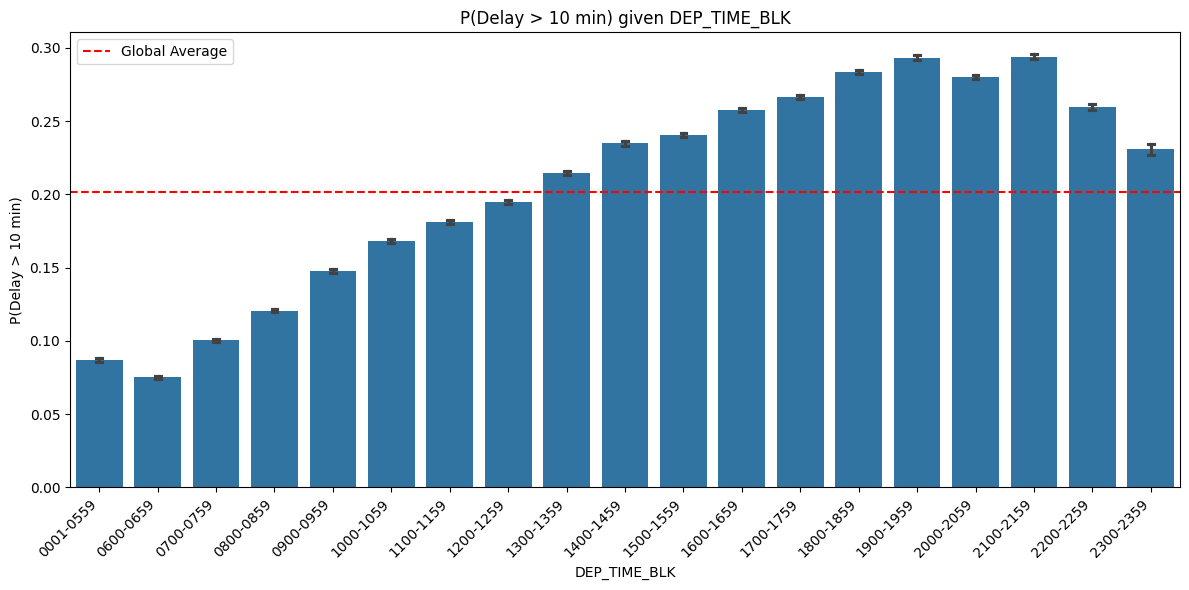

100%|██████████| 1/1 [00:44<00:00, 44.75s/it]


--- Analyzing Probability of Delay > 15 min ---
Global Baseline Probability: 16.59%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

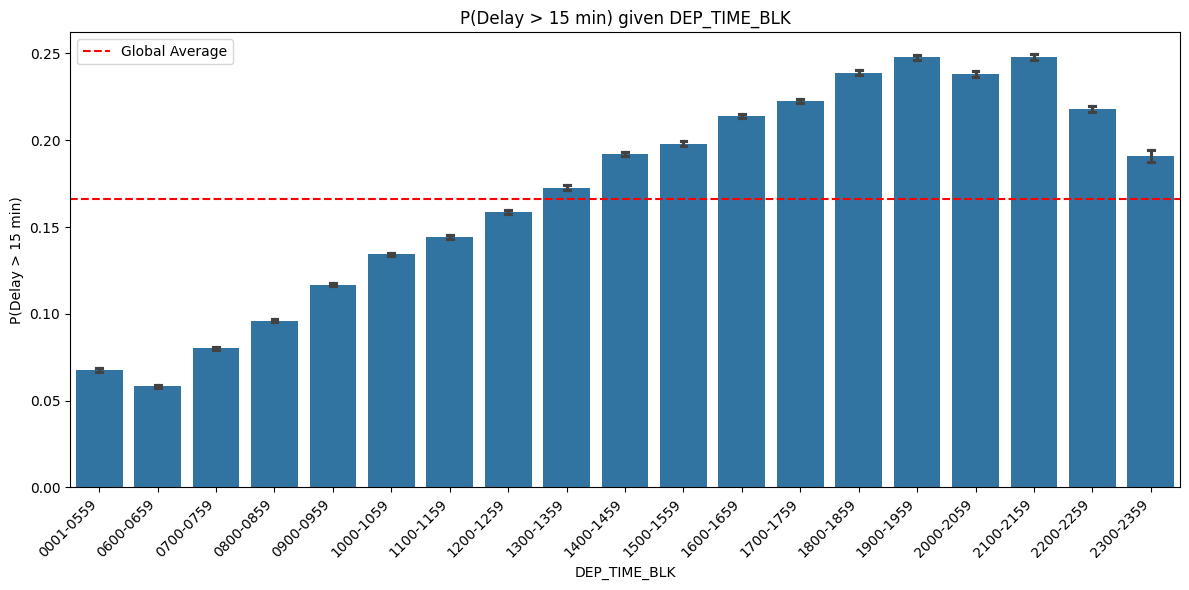

100%|██████████| 1/1 [00:43<00:00, 43.48s/it]


--- Analyzing Probability of Delay > 20 min ---
Global Baseline Probability: 13.92%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

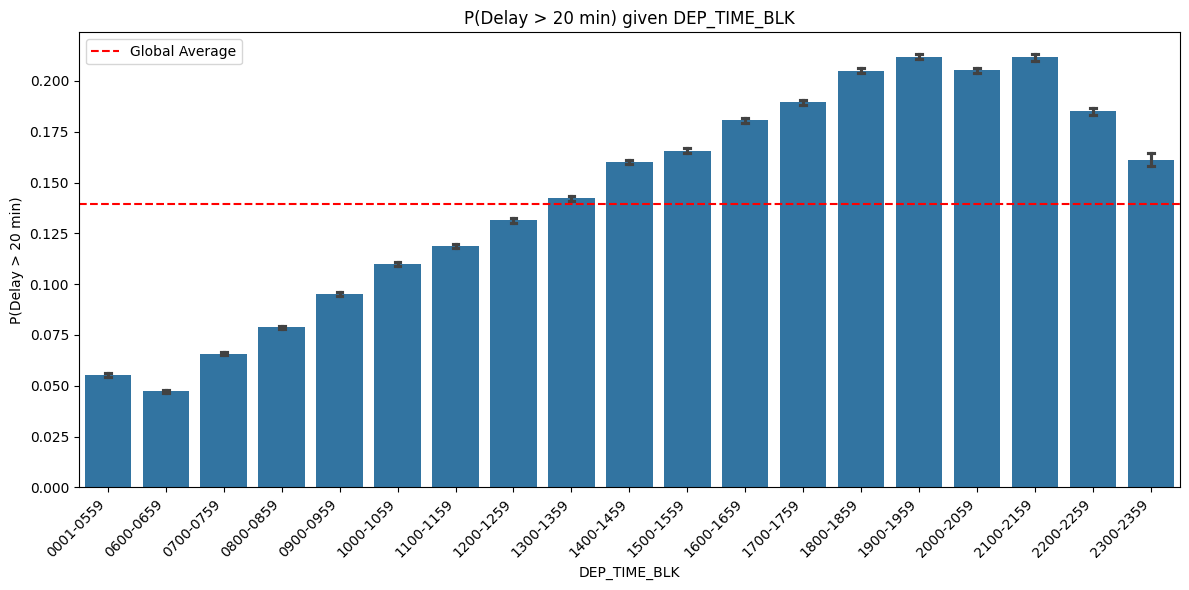

100%|██████████| 1/1 [00:47<00:00, 47.26s/it]


--- Analyzing Probability of Delay > 25 min ---
Global Baseline Probability: 11.87%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

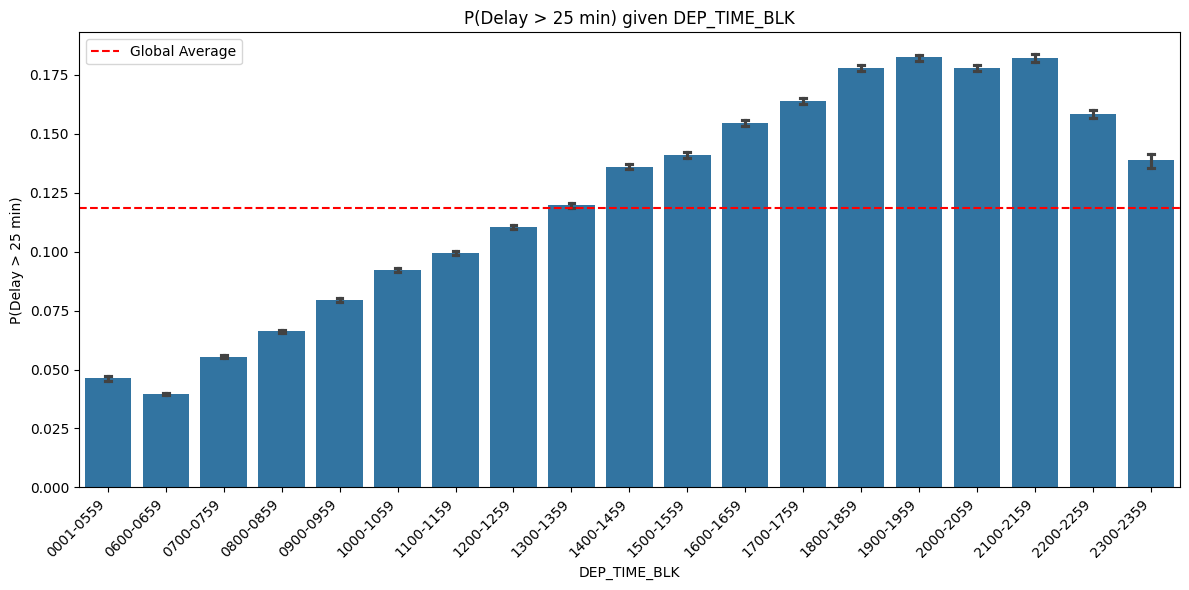

100%|██████████| 1/1 [00:46<00:00, 46.93s/it]


--- Analyzing Probability of Delay > 30 min ---
Global Baseline Probability: 10.19%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

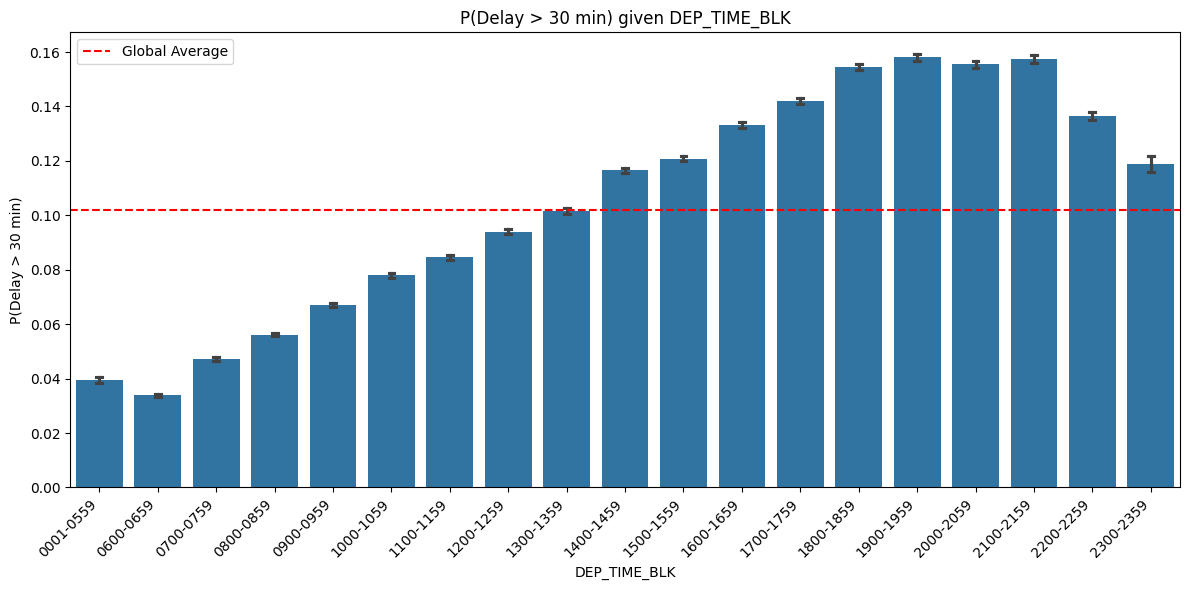

100%|██████████| 1/1 [00:47<00:00, 47.68s/it]


In [ ]:
thresholds = np.arange(5, 35, step=5)
for threshold in thresholds:
  analyze_conditional_probability(df, ['DEP_TIME_BLK'], delay_threshold=threshold)

--- Analyzing Probability of Delay > 5 min ---
Global Baseline Probability: 25.37%



  0%|          | 0/1 [00:00<?, ?it/s]

Stats for SNOW:
SNOW_binned
None (0)         0.250561
Light (0-0.5)    0.322699
Heavy (>0.5)     0.420111
Name: is_delayed_5, dtype: float64
------------------------------


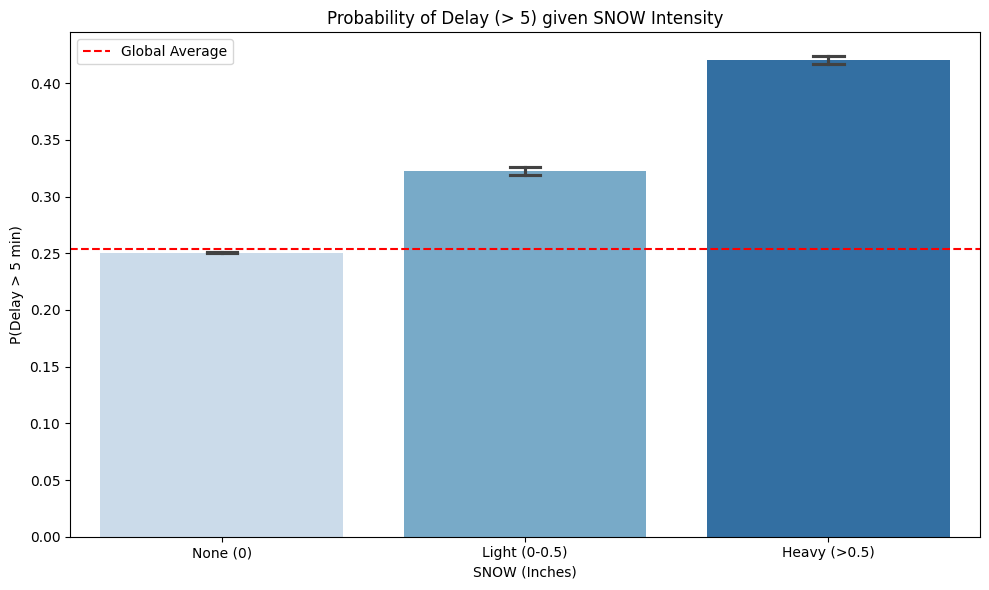

100%|██████████| 1/1 [02:27<00:00, 147.20s/it]


--- Analyzing Probability of Delay > 10 min ---
Global Baseline Probability: 20.18%



  0%|          | 0/1 [00:00<?, ?it/s]

Stats for SNOW:
SNOW_binned
None (0)         0.198957
Light (0-0.5)    0.266297
Heavy (>0.5)     0.355057
Name: is_delayed_10, dtype: float64
------------------------------


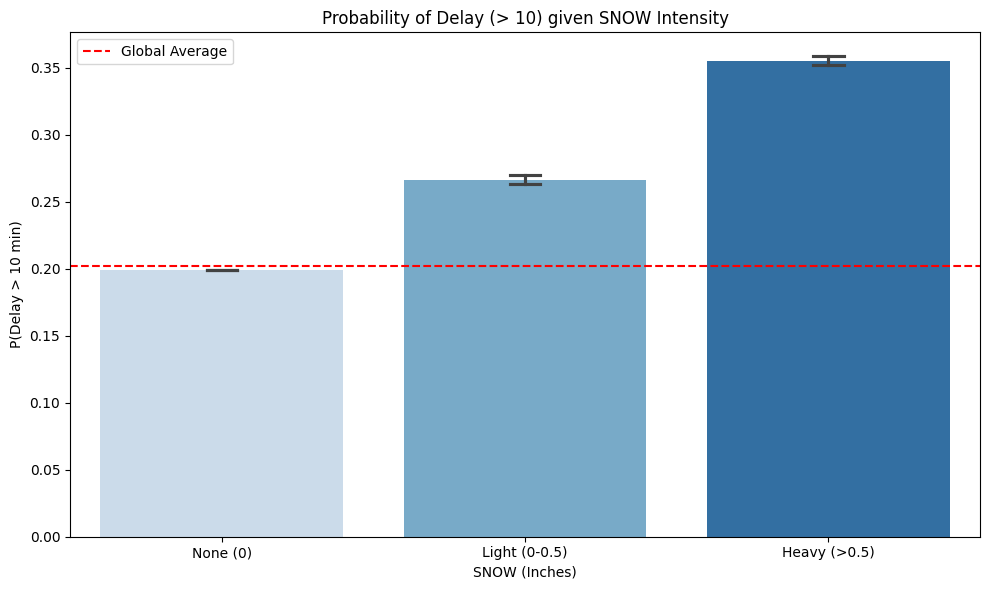

100%|██████████| 1/1 [02:24<00:00, 144.13s/it]


--- Analyzing Probability of Delay > 15 min ---
Global Baseline Probability: 16.59%



  0%|          | 0/1 [00:00<?, ?it/s]

Stats for SNOW:
SNOW_binned
None (0)         0.163298
Light (0-0.5)    0.223216
Heavy (>0.5)     0.305500
Name: is_delayed_15, dtype: float64
------------------------------


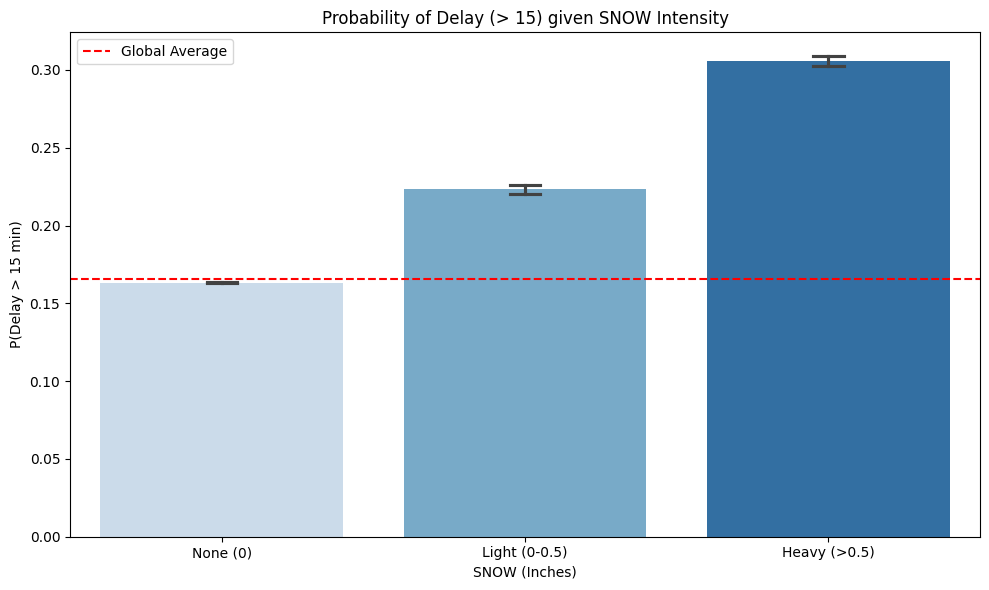

100%|██████████| 1/1 [02:27<00:00, 147.60s/it]


--- Analyzing Probability of Delay > 20 min ---
Global Baseline Probability: 13.92%



  0%|          | 0/1 [00:00<?, ?it/s]

Stats for SNOW:
SNOW_binned
None (0)         0.136916
Light (0-0.5)    0.190731
Heavy (>0.5)     0.264976
Name: is_delayed_20, dtype: float64
------------------------------


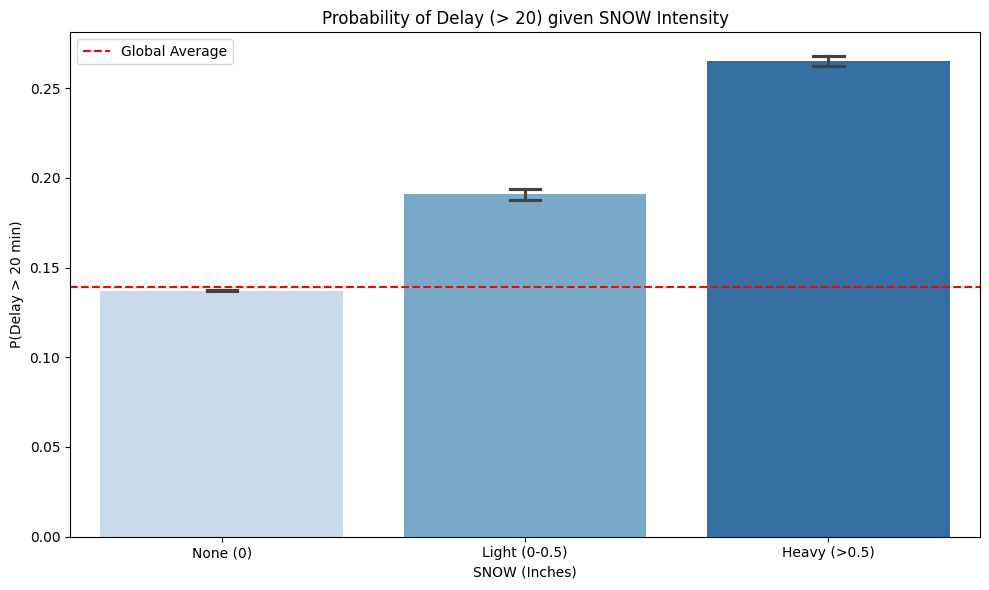

100%|██████████| 1/1 [02:22<00:00, 142.02s/it]


--- Analyzing Probability of Delay > 25 min ---
Global Baseline Probability: 11.87%



  0%|          | 0/1 [00:00<?, ?it/s]

Stats for SNOW:
SNOW_binned
None (0)         0.116552
Light (0-0.5)    0.165212
Heavy (>0.5)     0.232011
Name: is_delayed_25, dtype: float64
------------------------------


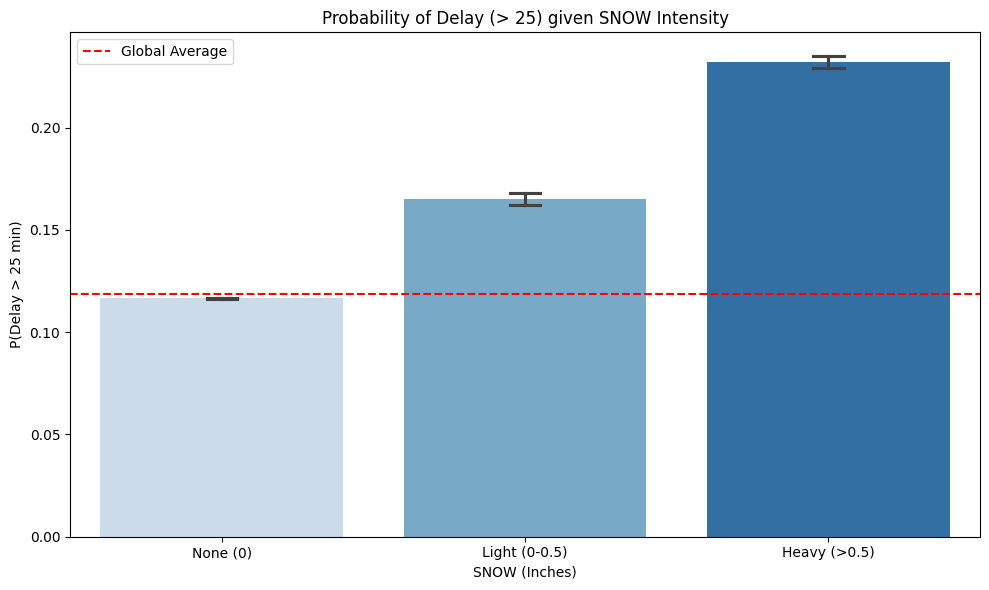

100%|██████████| 1/1 [02:35<00:00, 155.81s/it]


--- Analyzing Probability of Delay > 30 min ---
Global Baseline Probability: 10.19%



  0%|          | 0/1 [00:00<?, ?it/s]

Stats for SNOW:
SNOW_binned
None (0)         0.100016
Light (0-0.5)    0.144167
Heavy (>0.5)     0.204162
Name: is_delayed_30, dtype: float64
------------------------------


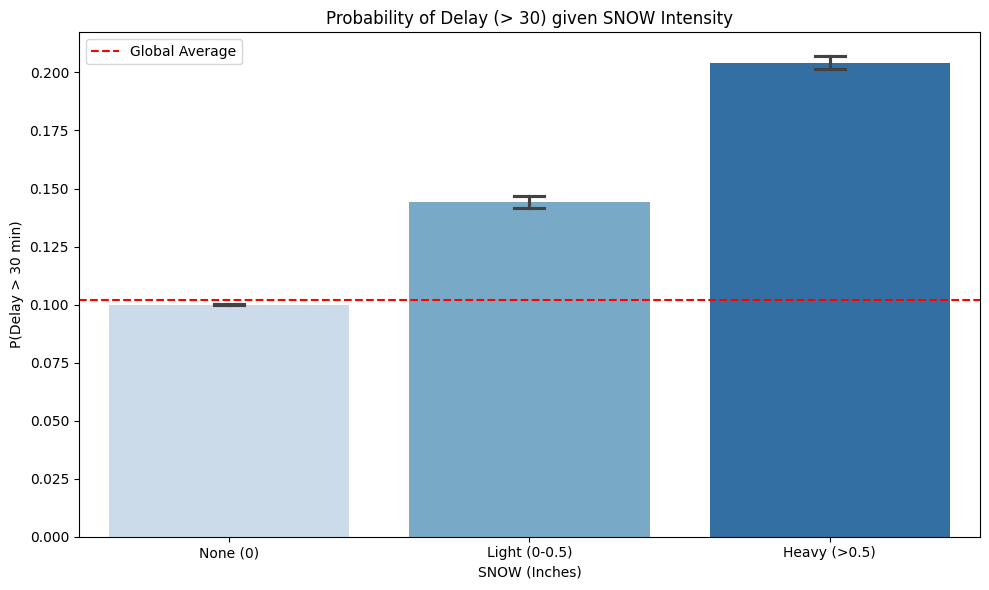

100%|██████████| 1/1 [02:04<00:00, 124.84s/it]


In [ ]:
for threshold in thresholds:
  analyze_conditional_probability(df, ['SNOW'], delay_threshold=threshold)

--- Analyzing Probability of Delay > 5 min ---
Global Baseline Probability: 25.37%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

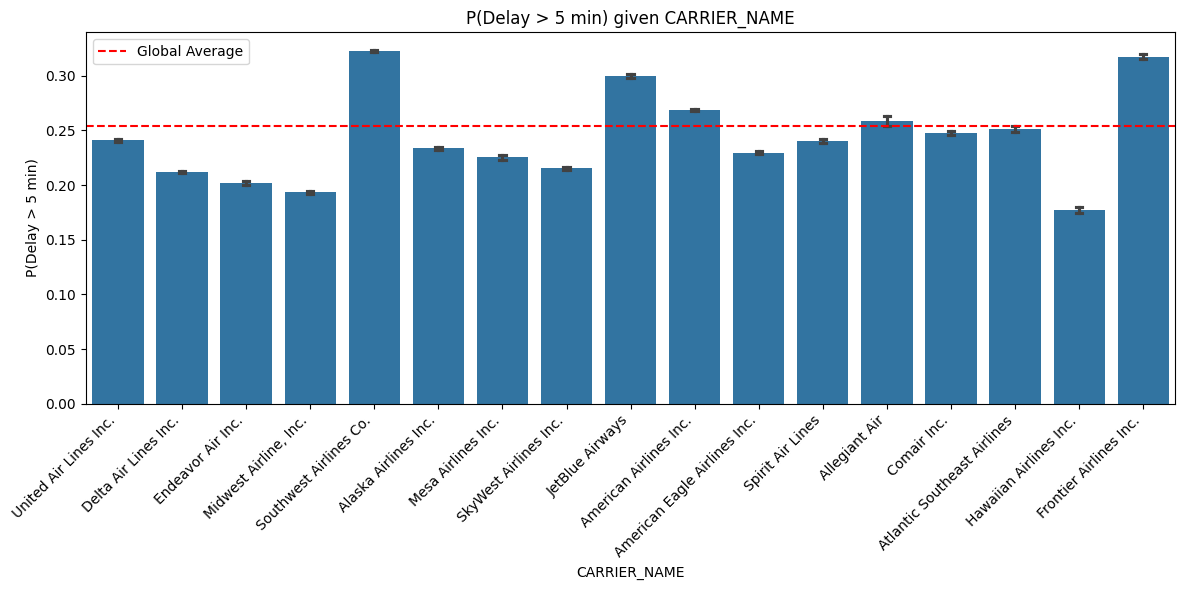

100%|██████████| 1/1 [01:08<00:00, 68.31s/it]


--- Analyzing Probability of Delay > 10 min ---
Global Baseline Probability: 20.18%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

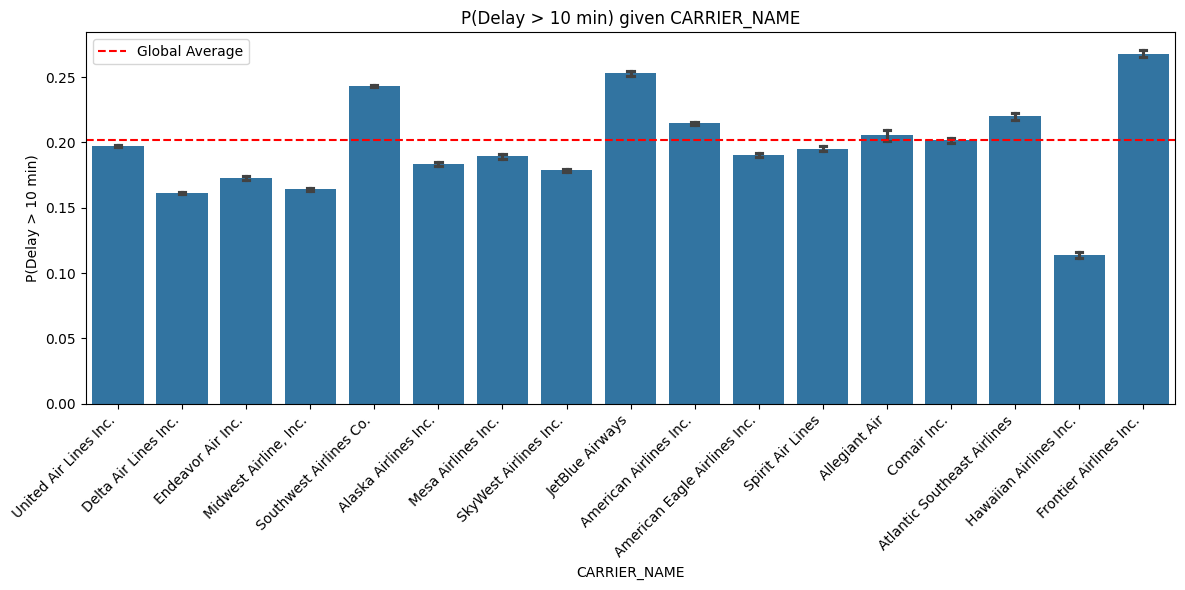

100%|██████████| 1/1 [01:11<00:00, 71.09s/it]


--- Analyzing Probability of Delay > 15 min ---
Global Baseline Probability: 16.59%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

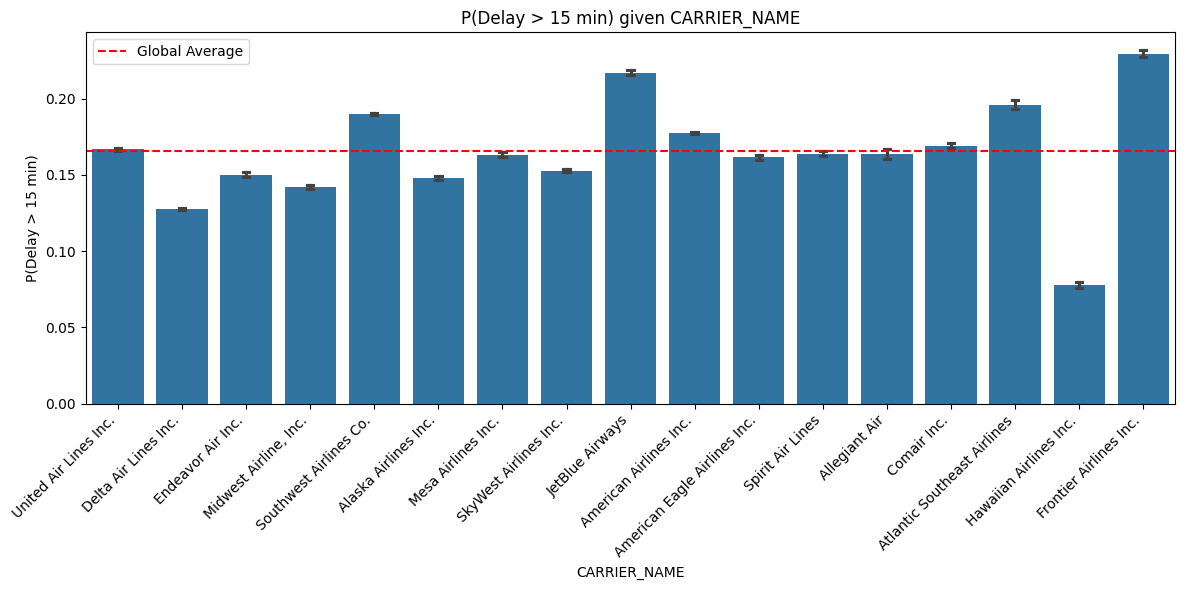

100%|██████████| 1/1 [01:06<00:00, 66.18s/it]


--- Analyzing Probability of Delay > 20 min ---
Global Baseline Probability: 13.92%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

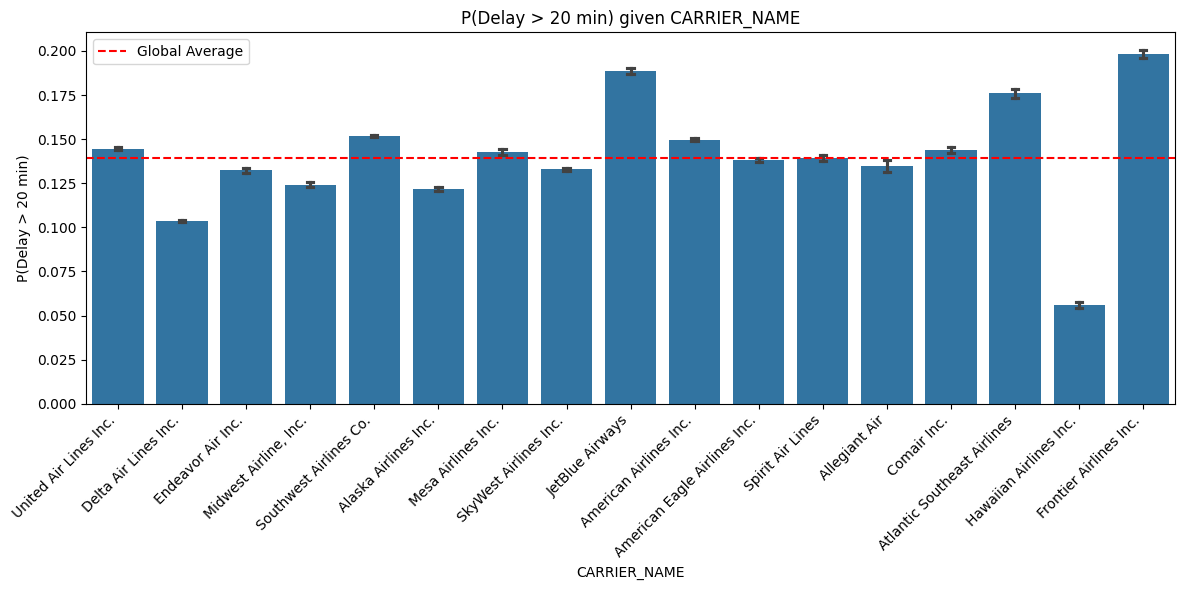

100%|██████████| 1/1 [01:09<00:00, 69.92s/it]


--- Analyzing Probability of Delay > 25 min ---
Global Baseline Probability: 11.87%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

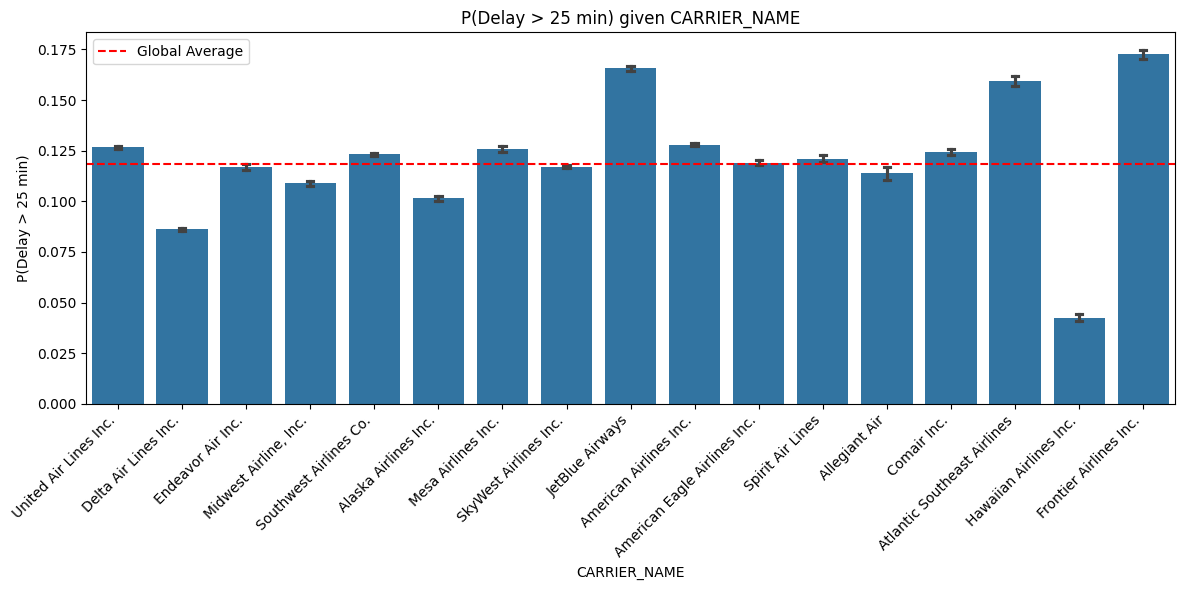

100%|██████████| 1/1 [01:10<00:00, 70.77s/it]


--- Analyzing Probability of Delay > 30 min ---
Global Baseline Probability: 10.19%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

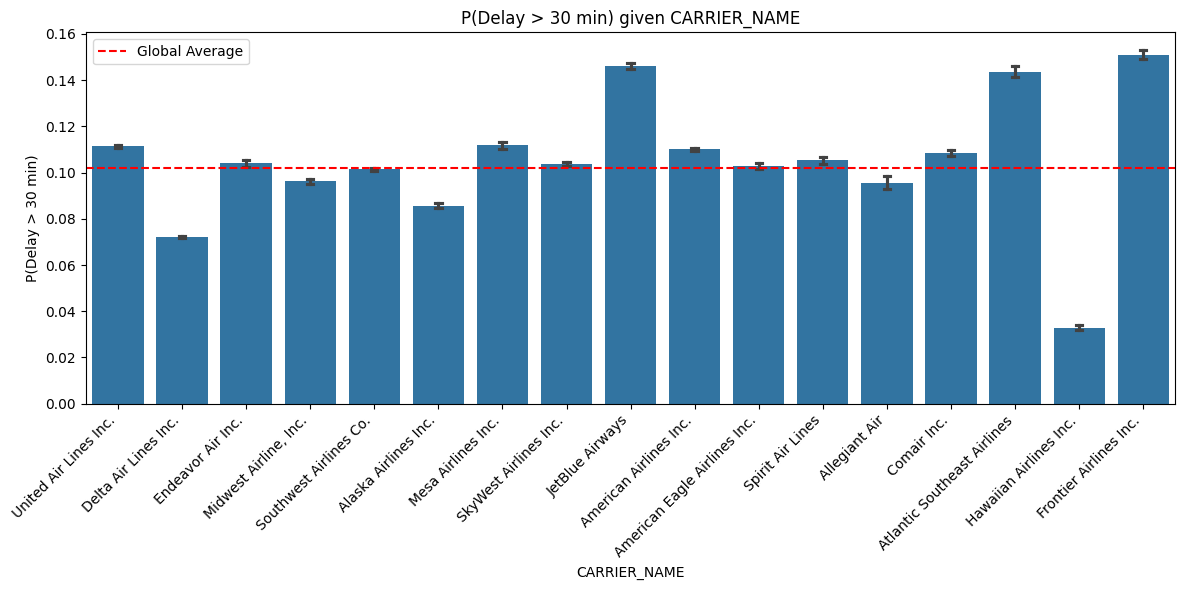

100%|██████████| 1/1 [01:12<00:00, 72.26s/it]


In [ ]:
for threshold in thresholds:
  analyze_conditional_probability(df, ['CARRIER_NAME'], delay_threshold=threshold)

In [ ]:
for threshold in thresholds:
  analyze_conditional_probability(df, ['MONTH'], delay_threshold=threshold)

--- Analyzing Probability of Delay > 5 min ---
Global Baseline Probability: 25.37%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

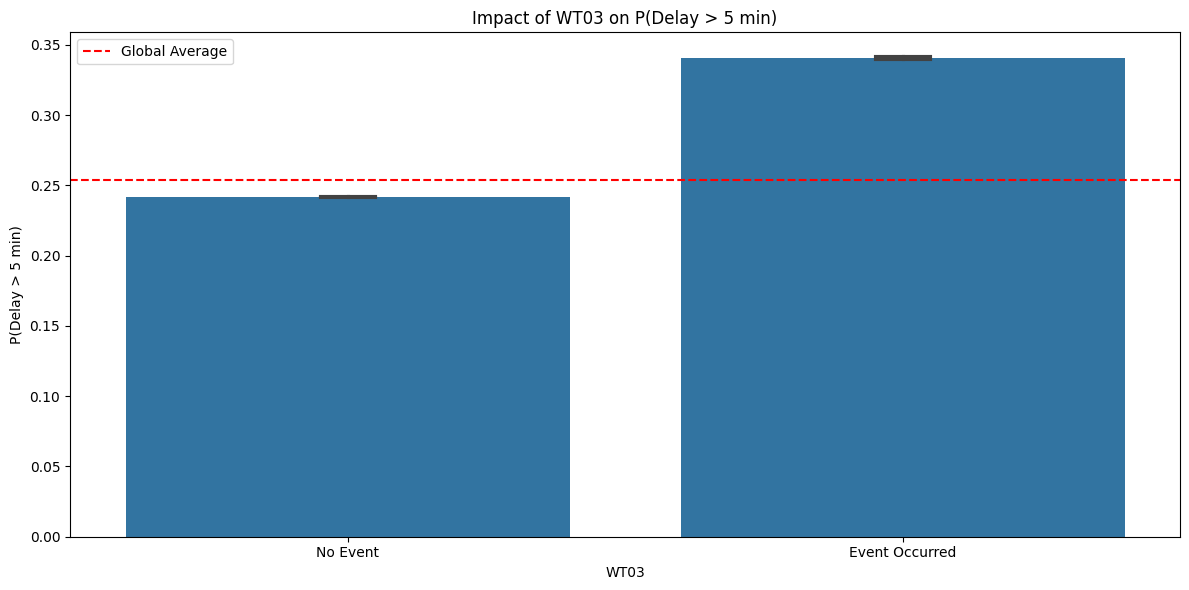

100%|██████████| 1/1 [02:03<00:00, 123.82s/it]


--- Analyzing Probability of Delay > 10 min ---
Global Baseline Probability: 20.18%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

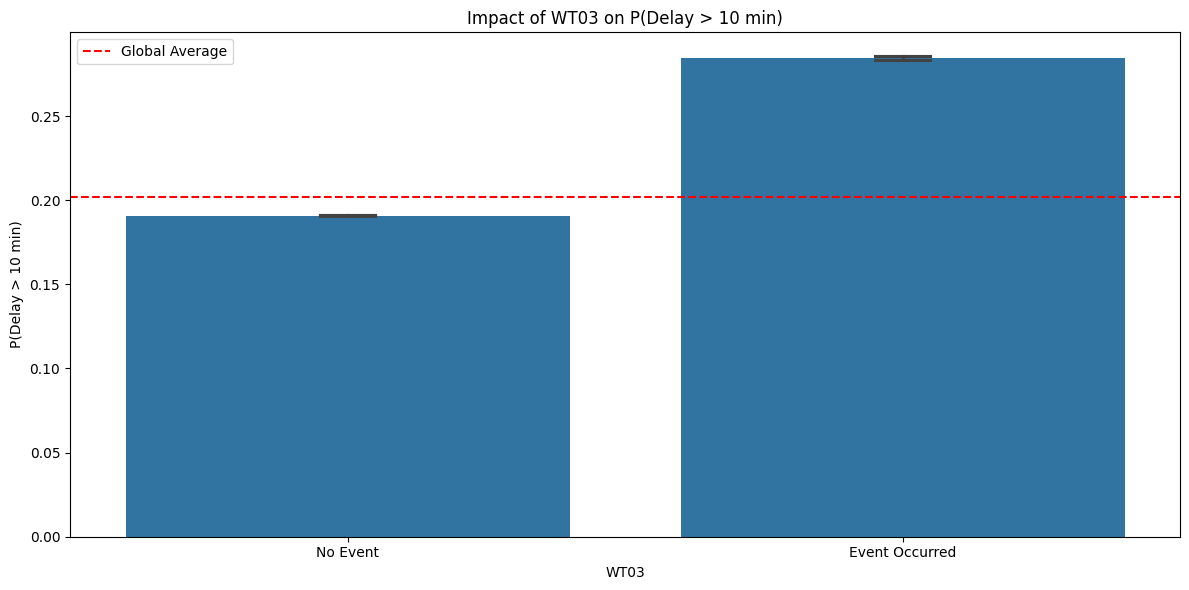

100%|██████████| 1/1 [02:06<00:00, 126.27s/it]


--- Analyzing Probability of Delay > 15 min ---
Global Baseline Probability: 16.59%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

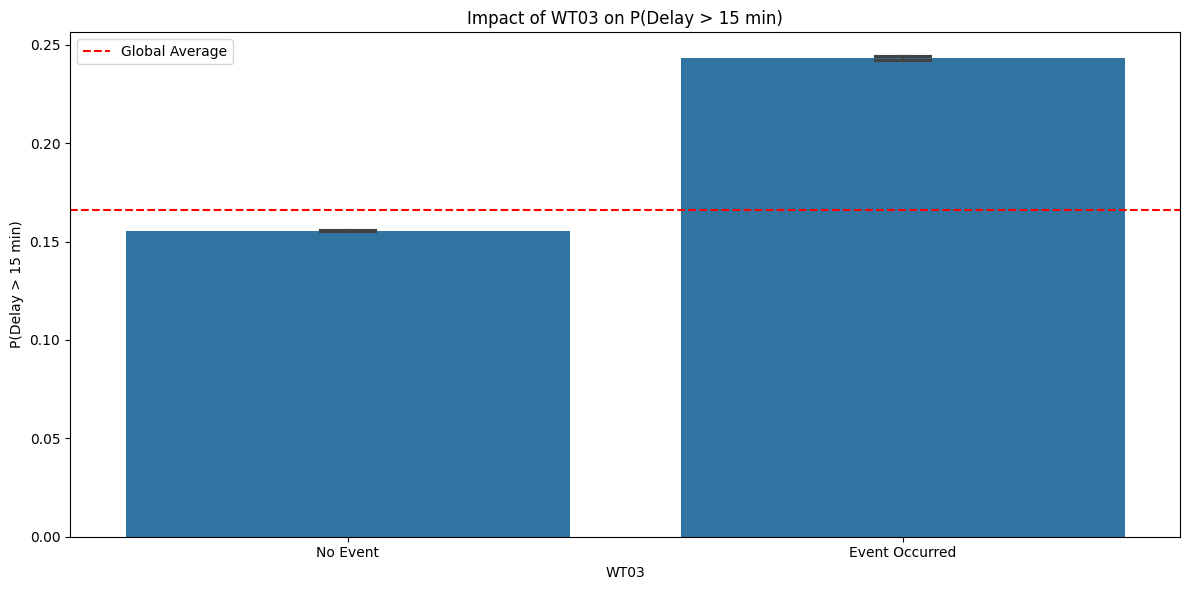

100%|██████████| 1/1 [01:54<00:00, 114.56s/it]


--- Analyzing Probability of Delay > 20 min ---
Global Baseline Probability: 13.92%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

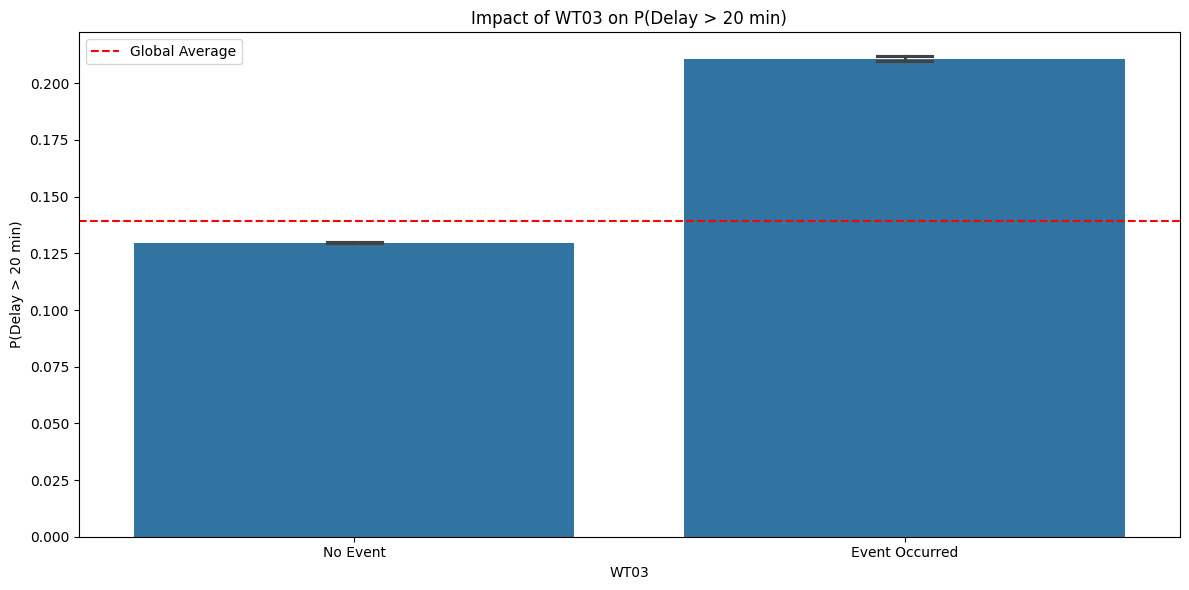

100%|██████████| 1/1 [01:46<00:00, 106.84s/it]


--- Analyzing Probability of Delay > 25 min ---
Global Baseline Probability: 11.87%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

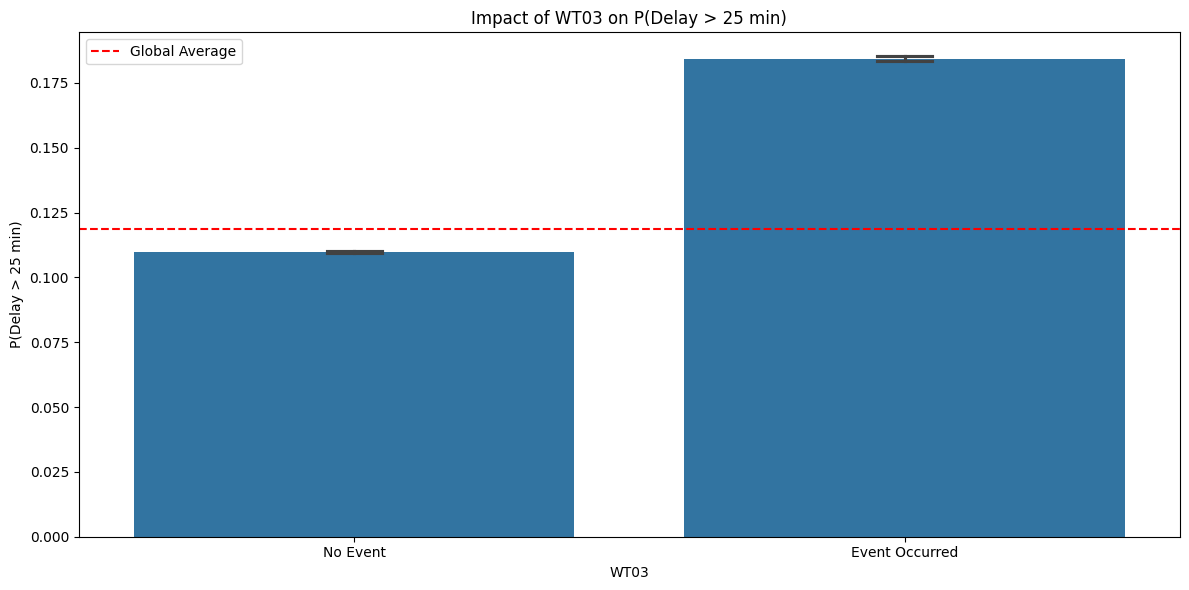

100%|██████████| 1/1 [01:49<00:00, 109.18s/it]


--- Analyzing Probability of Delay > 30 min ---
Global Baseline Probability: 10.19%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

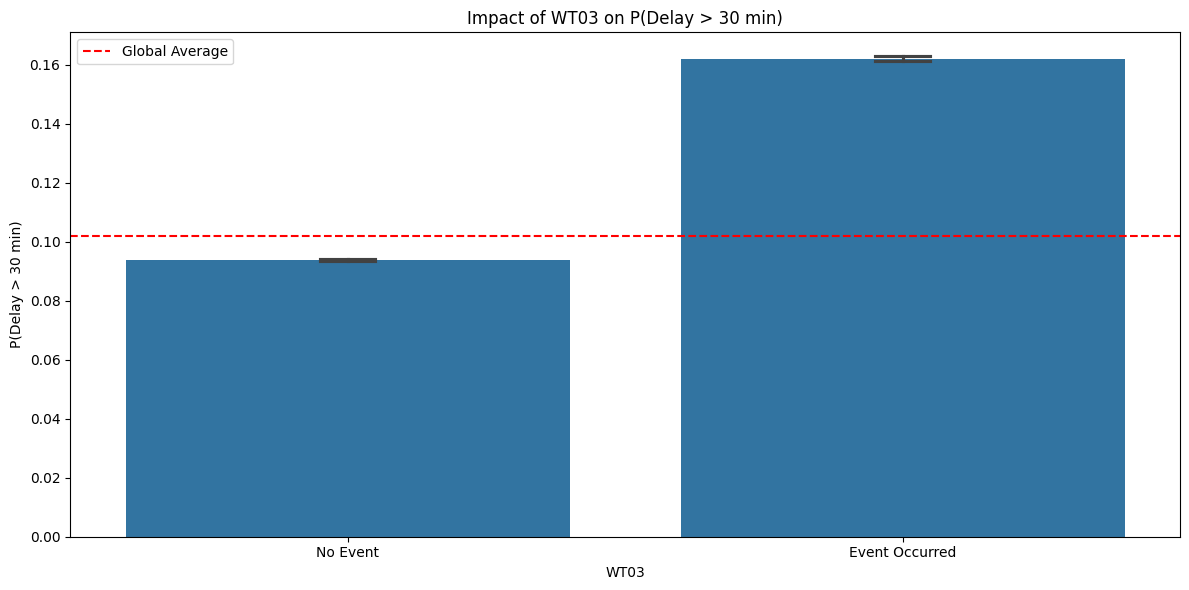

100%|██████████| 1/1 [01:41<00:00, 101.95s/it]


In [ ]:
for threshold in thresholds:
  analyze_conditional_probability(df, ['WT03'], delay_threshold=threshold)

--- Analyzing Probability of Delay > 5 min ---
Global Baseline Probability: 25.37%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

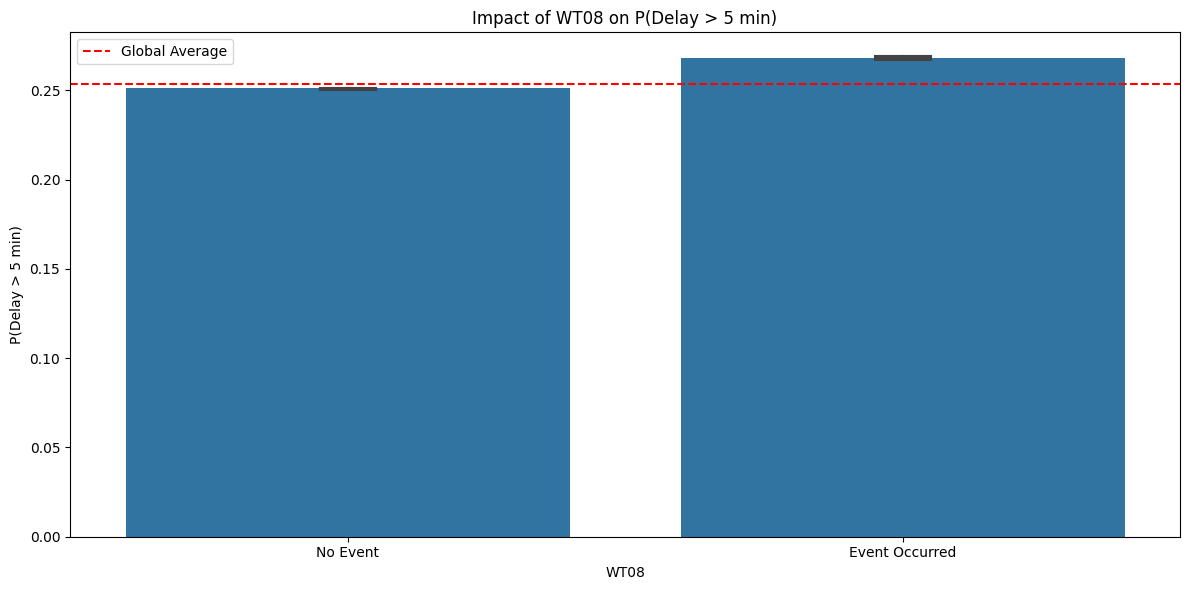

100%|██████████| 1/1 [01:46<00:00, 106.82s/it]


--- Analyzing Probability of Delay > 10 min ---
Global Baseline Probability: 20.18%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

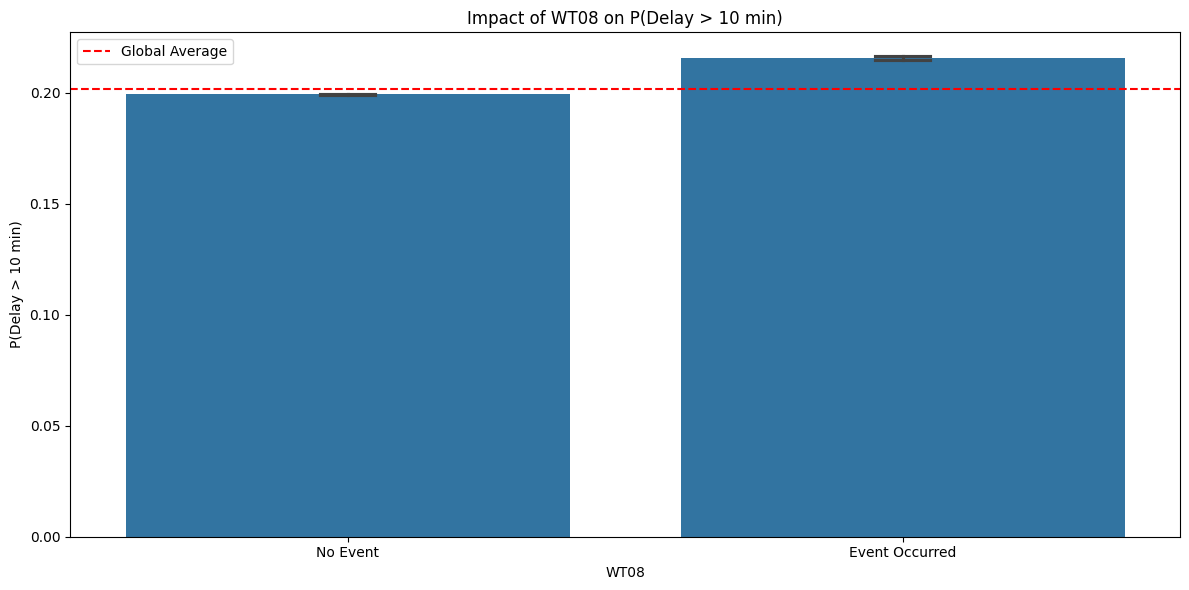

100%|██████████| 1/1 [01:43<00:00, 103.15s/it]


--- Analyzing Probability of Delay > 15 min ---
Global Baseline Probability: 16.59%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

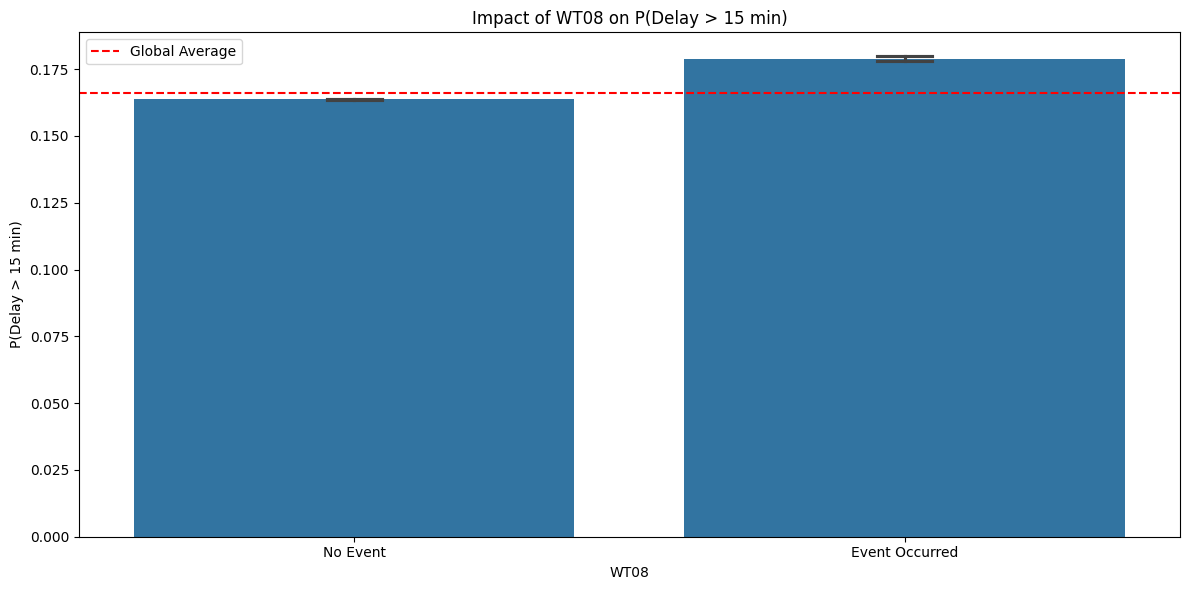

100%|██████████| 1/1 [01:38<00:00, 98.23s/it]


--- Analyzing Probability of Delay > 20 min ---
Global Baseline Probability: 13.92%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

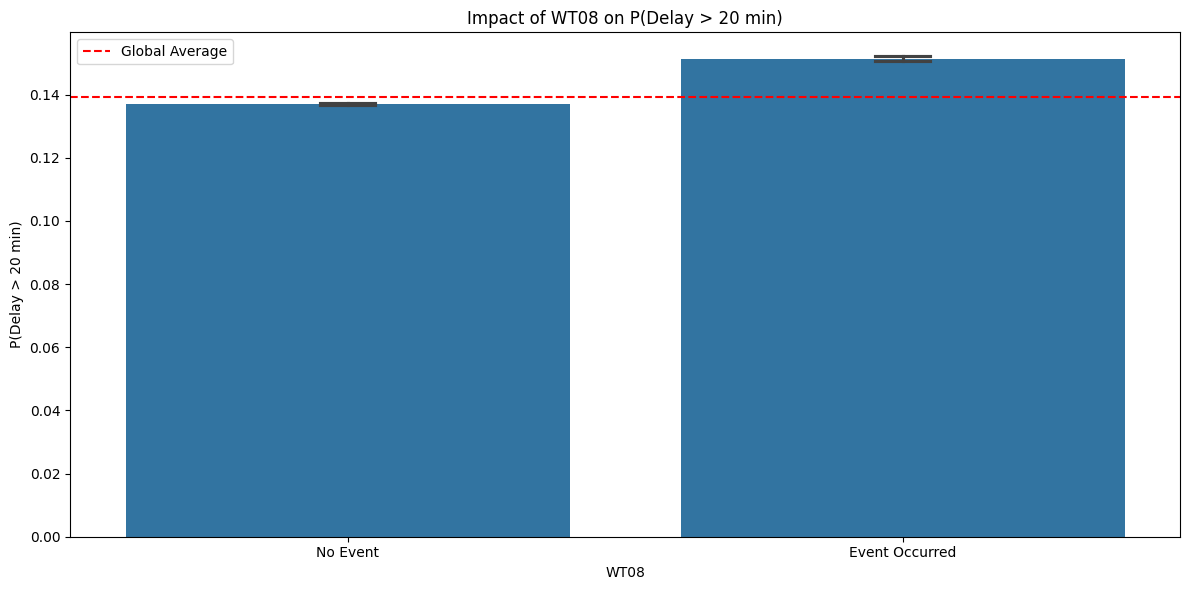

100%|██████████| 1/1 [01:45<00:00, 105.49s/it]


--- Analyzing Probability of Delay > 25 min ---
Global Baseline Probability: 11.87%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

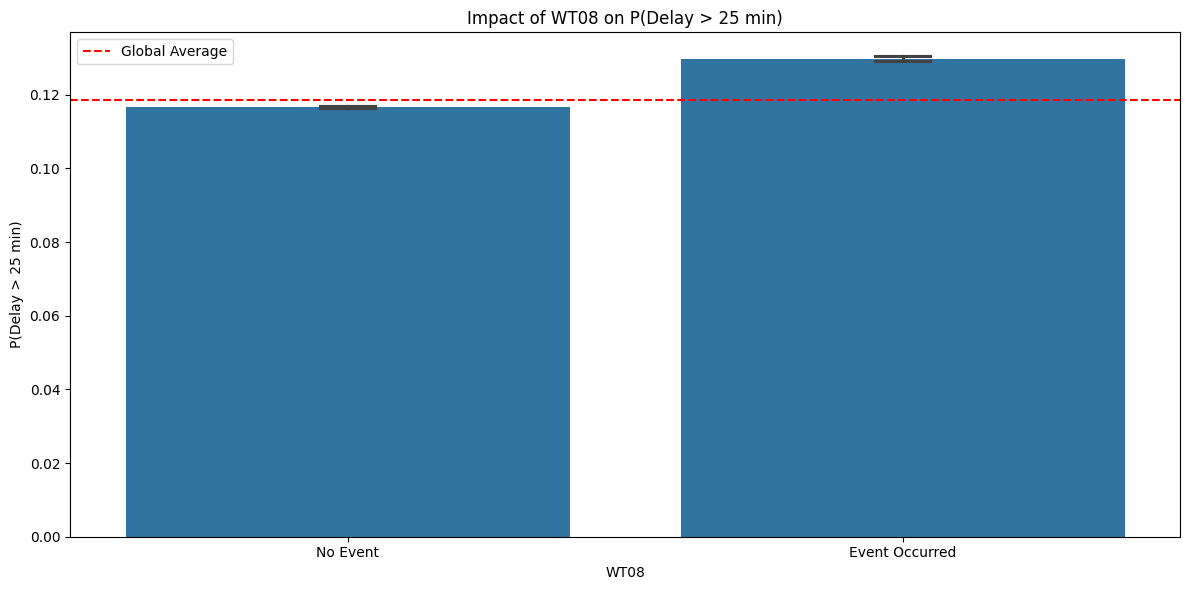

100%|██████████| 1/1 [02:05<00:00, 125.93s/it]


--- Analyzing Probability of Delay > 30 min ---
Global Baseline Probability: 10.19%



  0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

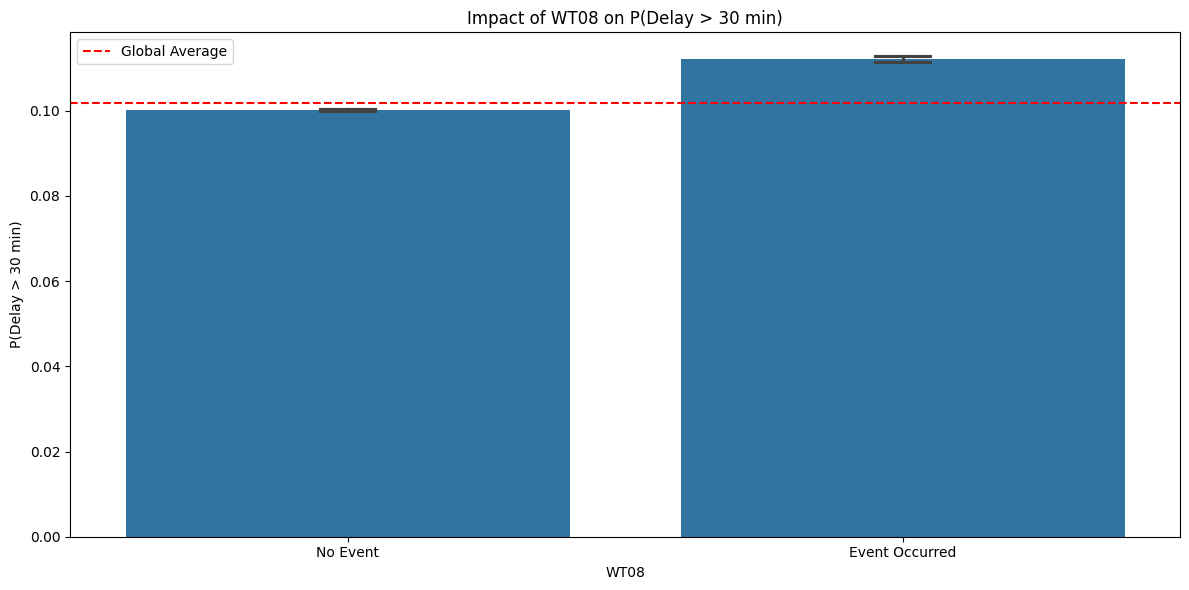

100%|██████████| 1/1 [02:06<00:00, 126.62s/it]


In [ ]:
for threshold in thresholds:
  analyze_conditional_probability(df, ['WT08'], delay_threshold=threshold)

# What's the proportion of not-delayed flights vs. delay (of any length)?

In [ ]:
# df['is_delayed'] = (df['DEP_DELAY_NEW'] > 0).astype(int)

In [ ]:
(df[delay_flag]).value_counts(normalize=True)

is_delayed
0    0.658639
1    0.341361
Name: proportion, dtype: float64

<Axes: >

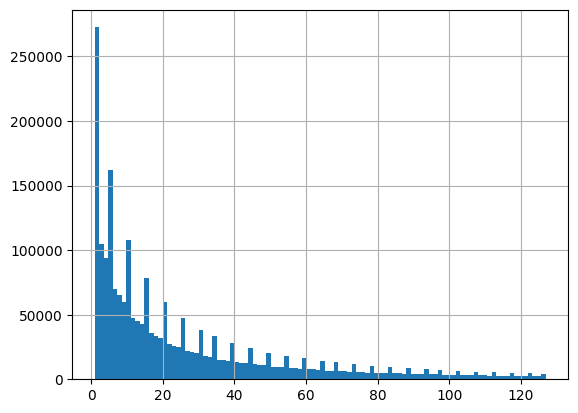

In [ ]:
df[df['DEP_DELAY_NEW'] > 0]['DEP_DELAY_NEW'].hist(bins=100)

In [ ]:
df[df['DEP_DELAY_NEW'] > 0]['DEP_DELAY_NEW'].describe(percentiles=[.9, .95, .99, .999])

count    2.167317e+06
mean     2.607311e+01
std      2.847563e+01
min      1.000000e+00
50%      1.500000e+01
90%      7.000000e+01
95%      9.100000e+01
99%      1.180000e+02
99.9%    1.270000e+02
max      1.270000e+02
Name: DEP_DELAY_NEW, dtype: float64

In [ ]:
print((df['DEP_DELAY_NEW'] >= 15).sum())
(df['DEP_DEL15'] > 0).sum()

1096285


np.int64(1096285)

# NOT DOING THIS Option 1: Sample instead using top 5 most frequent departure airports

Atlanta Municapl = Hartsfield-Jackson Atlanta International Airport

Stapleton International == Denver International Airport

Douglas Municipal ==?? Charllote Douglas International? Unclear


In [ ]:
df['DEPARTING_AIRPORT'].value_counts().head(10)

DEPARTING_AIRPORT
Atlanta Municipal                   387357
Chicago O'Hare International        320787
Dallas Fort Worth Regional          290267
Stapleton International             242060
Douglas Municipal                   227630
Los Angeles International           213559
Houston Intercontinental            172889
Phoenix Sky Harbor International    170598
San Francisco International         163152
LaGuardia                           161788
Name: count, dtype: int64

In [ ]:
airports = ['Atlanta Municipal', "Chicago O'Hare International", "Dallas Fort Worth Regional", "Stapleton International", "Douglas Municipal"]

df_sampled = df.loc[df['DEPARTING_AIRPORT'].isin(airports)]
df_sampled

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW DEP_TIME_BLK  DISTANCE_GROUP  \
2            1            3             44    0600-0659               4   
6            1            3              0    0001-0559               3   
9            1            3              0    0700-0759               5   
14           1            3              0    1200-1259               3   
21           1            3              0    0700-0759               6   
...        ...          ...            ...          ...             ...   
6488413     12            7              1    2200-2259               2   
6488424     12            7              0    2200-2259               1   
6488444     12            7              0    2300-2359               1   
6488445     12            1              0    2200-2259               2   
6488457     12            5              0    2200-2259               3   

         CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
2                  0.0           26.0        0.0             0.0   
6                  NaN            NaN        NaN             NaN   
9                  NaN            NaN        NaN             NaN   
14                 NaN            NaN        NaN             NaN   
21                 NaN            NaN        NaN             NaN   
...                ...            ...        ...             ...   
6488413            NaN            NaN        NaN             NaN   
6488424            NaN            NaN        NaN             NaN   
6488444            NaN            NaN        NaN             NaN   
6488445            NaN            NaN        NaN             NaN   
6488457            NaN            NaN        NaN             NaN   

         LATE_AIRCRAFT_DELAY  ...  WT06  WT07  WT08 WT09  WT10  WT11  \
2                        0.0  ...   0.0   0.0   0.0  0.0   0.0   0.0   
6                        NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
9                        NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
14                       NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
21                       NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
...                      ...  ...   ...   ...   ...  ...   ...   ...   
6488413                  NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
6488424                  NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
6488444                  NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
6488445                  NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   
6488457                  NaN  ...   0.0   0.0   0.0  0.0   0.0   0.0   

         AWND_missing  TMIN_missing  TMAX_missing  is_delayed  
2               False         False         False           1  
6               False         False         False           0  
9               False         False         False           0  
14              False         False         False           0  
21              False         False         False           0  
...               ...           ...           ...         ...  
6488413         False         False         False           1  
6488424         False         False         False           0  
6488444         False         False         False           0  
6488445         False         False         False           0  
6488457         False         False         False           0  

[1468101 rows x 45 columns]

In [ ]:
print((df_sampled['is_delayed']).value_counts(normalize=True))
(df['is_delayed']).value_counts(normalize=True)

is_delayed
0    0.636564
1    0.363436
Name: proportion, dtype: float64


is_delayed
0    0.658639
1    0.341361
Name: proportion, dtype: float64

# Split-independent encodings: Cyclical and One-Hot Encodings for Df_sampled


In [ ]:
# --- 1. Cyclical Encoding Function ---
def encode_cyclical(df, col, max_val):
    """Encodes a cyclical feature using sine and cosine transformations."""
    # Ensure the column is numeric before calculation
    df[col] = pd.to_numeric(df[col], errors='coerce')

    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

# --- 2. Convert DEP_TIME_BLK to a Numeric Continuous Time Sequence ---

def time_block_to_continuous_hour(time_block_str):
    """
    Extracts the center point of the time block as a continuous hour (0.0 to 24.0).
    """
    if pd.isna(time_block_str) or not isinstance(time_block_str, str):
        return np.nan

    if time_block_str == '0001-0559':
        # Center of 00:01 to 05:59 is ~03:00 (3 hours past midnight)
        return 3.0

    # For standard hourly blocks (e.g., '1000-1059'):
    try:
        start_hour = int(time_block_str[:2])
        # The center of a one-hour block is 30 minutes (0.5 hours) after the start
        return start_hour + 0.5
    except ValueError:
        return np.nan

In [ ]:
# ==============================================================================
#                 STAGE 1: ENCODING INDEPENDENT OF THE TARGET
# (Perform before train-test split)
# ==============================================================================

# --- 3. Cyclical Encoding ---
# Convert time block string to continuous hour
df['DEP_TIME_CONT_HOUR'] = df['DEP_TIME_BLK'].apply(time_block_to_continuous_hour)
M_TIME_BLOCK = 24.0

cyclical_cols = {
    'MONTH': 12,
    'DAY_OF_WEEK': 7,
    'DEP_TIME_CONT_HOUR': M_TIME_BLOCK
}

for col, max_val in cyclical_cols.items():
    df = encode_cyclical(df, col, max_val)

# Drop the original and intermediate cyclical columns
df = df.drop(columns=list(cyclical_cols.keys()))
df = df.drop(columns=['DEP_TIME_BLK'])
print(f"DataFrame shape after cyclical encoding: {df.shape}")


# --- 4. One-Hot Encoding for remaining nominal categories (Low Cardinality) ---
ohe_cols = [
    'DISTANCE_GROUP',
    'CARRIER_NAME',
]

df = pd.get_dummies(
    df,
    columns=ohe_cols,
    prefix=ohe_cols,
    drop_first=True
)

print(f"DataFrame shape after both cyclical and One-Hot Encoding: {df.shape}")
print("-" * 50)

DataFrame shape after cyclical encoding: (6357979, 49)
DataFrame shape after both cyclical and One-Hot Encoding: (6357979, 73)
--------------------------------------------------


# 10 times: Stratified subsampling 1.5 million rows

In [ ]:
from typing import List, Tuple, Dict

# --- FUNCTION: Stratified Train/Test Split ---

def split_subsample(X_sub: pd.DataFrame,
                    y_sub: pd.DataFrame,
                    test_ratio: float = 0.2,
                    stratify_column: str = 'DEP_DEL15',
                    random_state: int = 42) -> Dict[str, pd.DataFrame]:
    """
    Splits a single subsample into stratified train and test sets.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X_sub,
        y_sub,
        test_size=test_ratio,
        stratify=y_sub[stratify_column],
        random_state=random_state
    )
    return X_train, X_test, y_train, y_test
    # return {
    #     'X_train': X_train,
    #     'X_test': X_test,
    #     'y_train': y_train,
    #     'y_test': y_test
    # }

def target_encoding(X_train, X_test, AIRPORT_COL, ENCODED_COL, delay_flag = 'DEP_DEL15'):
  # Define the encoder
  airport_target_encoder = ce.TargetEncoder(
      cols=[AIRPORT_COL],
      smoothing=1.0,
      min_samples_leaf=20
  )

  print(f"Applying Target Encoding for '{AIRPORT_COL}', new col: '{ENCODED_COL}'")

  # 5a. FIT AND TRANSFORM (TRAIN SET) - **NO LEAKAGE**
  # The encoder learns the average delay rate from the training set target (y_train)
  X_train[ENCODED_COL] = airport_target_encoder.fit_transform(
      X_train[AIRPORT_COL], y_train[delay_flag]
  )[AIRPORT_COL]


  # 5b. TRANSFORM ONLY (TEST SET) - **NO LEAKAGE**
  # The encoder uses the averages learned from the training set to transform the test set
  X_test[ENCODED_COL] = airport_target_encoder.transform(
      X_test[AIRPORT_COL]
  )[AIRPORT_COL]

  # Drop the original high-cardinality column from both sets
  X_train = X_train.drop(columns=[AIRPORT_COL])
  X_test = X_test.drop(columns=[AIRPORT_COL])


  print("Target Encoding complete. X_train and X_test are now fully encoded.")
  print(f"Final X_train shape: {X_train.shape}")
  print(f"Final X_test shape: {X_test.shape}")
  print("-" * 50)
  # print("Preview of X_train with new target feature:")
  # print(X_train[[c for c in X_train.columns if any(s in c for s in ['sin', 'cos', 'RATE'])]].head())
  return X_train, X_test

In [ ]:
# Ensure delay_flag column is present before splitting if it was temporary for sampling
if delay_flag not in df.columns:
    df[delay_flag] = (df['DEP_DELAY_NEW'] > 0).astype(int)

# Define features (X) and target (y)
# X will contain all columns except 'DEP_DELAY_NEW' and delay_flag
# y will be the delay_flag column for stratification and binary classification

X = df.drop(columns=['DEP_DELAY_NEW', delay_flag])
y = df[['DEP_DELAY_NEW', delay_flag]]

In [ ]:
# ====================================================================
# --- 4. EXECUTION ---
# ====================================================================

N_SUBSAMPLES = 10
SUBSAMPLE_SIZE = 1500000
TEST_RATIO = 0.2 # 80:20 split

print("\n--- 2. Creating and Splitting Each Subsample (80:20 Stratified) ---")
for i in trange(N_SUBSAMPLES):
    # We use train_test_split logic with test_size=subsample_size/N_TOTAL
    # to select the desired subset while stratifying. The 'train' set is discarded.
    # Note: Set random_state to None for true randomness in each iteration.

    _, X_sub, _, y_sub = train_test_split(
        X,
        y,
        test_size=SUBSAMPLE_SIZE,  # Directly use the desired size
        stratify=y[delay_flag],
        random_state=i # Use a different seed for each sample
    )
    print(f"Generated Subsample {i+1}/{N_SUBSAMPLES}. Delayed Ratio: {y_sub[delay_flag].mean():.4f}")

    # Perform the stratified 80:20 split on the current subsample
    X_train, X_test, y_train, y_test = split_subsample(
        X_sub=X_sub,
        y_sub=y_sub,
        test_ratio=TEST_RATIO,
        random_state=i # Use a different seed for each split
    )
    print(f"Sample {i+1}: Train size={len(X_train)} ({y_train[delay_flag].mean():.4f} delayed ratio); "
          f"Test size={len(X_test)} ({y_test[delay_flag].mean():.4f} delayed ratio)")
    print("-" * 50)

    print("conducting target encodings:")
    AIRPORT_COL = 'PREVIOUS_AIRPORT'
    ENCODED_COL = 'PREV_AIRPORT_DELAY_RATE'
    X_train, X_test = target_encoding(X_train, X_test, AIRPORT_COL, ENCODED_COL)

    AIRPORT_COL = 'DEPARTING_AIRPORT'
    ENCODED_COL = 'DEP_AIRPORT_DELAY_RATE'
    X_train, X_test = target_encoding(X_train, X_test, AIRPORT_COL, ENCODED_COL)

    # Store the results
    X_train.to_csv(f'/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/X_train_{i}.csv', index=False)
    X_test.to_csv(f'/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/X_test_{i}.csv', index=False)

    y_train.to_csv(f'/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/y_train_{i}.csv', index=False)
    y_test.to_csv(f'/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/y_test_{i}.csv', index=False)

print("\n--- Process Complete ---")
print(f"You now have 10 independent dictionaries in 'all_datasets', each containing X_train, X_test, y_train, and y_test.")


--- 2. Creating and Splitting Each Subsample (80:20 Stratified) ---


  0%|          | 0/10 [00:00<?, ?it/s]

Generated Subsample 1/10. Delayed Ratio: 0.1724
Sample 1: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 10%|█         | 1/10 [02:00<18:03, 120.38s/it]

Generated Subsample 2/10. Delayed Ratio: 0.1724
Sample 2: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 20%|██        | 2/10 [03:47<15:01, 112.74s/it]

Generated Subsample 3/10. Delayed Ratio: 0.1724
Sample 3: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 30%|███       | 3/10 [05:39<13:04, 112.12s/it]

Generated Subsample 4/10. Delayed Ratio: 0.1724
Sample 4: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 40%|████      | 4/10 [07:26<11:02, 110.35s/it]

Generated Subsample 5/10. Delayed Ratio: 0.1724
Sample 5: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 50%|█████     | 5/10 [09:15<09:08, 109.65s/it]

Generated Subsample 6/10. Delayed Ratio: 0.1724
Sample 6: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 60%|██████    | 6/10 [11:04<07:17, 109.39s/it]

Generated Subsample 7/10. Delayed Ratio: 0.1724
Sample 7: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 70%|███████   | 7/10 [12:52<05:27, 109.10s/it]

Generated Subsample 8/10. Delayed Ratio: 0.1724
Sample 8: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 80%|████████  | 8/10 [14:45<03:40, 110.37s/it]

Generated Subsample 9/10. Delayed Ratio: 0.1724
Sample 9: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


 90%|█████████ | 9/10 [16:36<01:50, 110.52s/it]

Generated Subsample 10/10. Delayed Ratio: 0.1724
Sample 10: Train size=1200000 (0.1724 delayed ratio); Test size=300000 (0.1724 delayed ratio)
--------------------------------------------------
conducting target encodings:
Applying Target Encoding for 'PREVIOUS_AIRPORT', new col: 'PREV_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Applying Target Encoding for 'DEPARTING_AIRPORT', new col: 'DEP_AIRPORT_DELAY_RATE'
Target Encoding complete. X_train and X_test are now fully encoded.
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------
Final X_train shape: (1200000, 71)
Final X_test shape: (300000, 71)
--------------------------------------------------


100%|██████████| 10/10 [18:26<00:00, 110.62s/it]


--- Process Complete ---
You now have 10 independent dictionaries in 'all_datasets', each containing X_train, X_test, y_train, and y_test.


In [ ]:
# # Ensure 'is_delayed' column is present and correct (it might have been dropped after plotting)
# if delay_flag not in df.columns:
#     df[delay_flag] = (df['DEP_DELAY_NEW'] >= delay_threshold).astype(int)

# # Define the target sample size
# target_sample_size = 1,500,000

# # Calculate the fraction needed for the sample, ensuring it's not greater than 1
# sampling_fraction = min(target_sample_size / len(df), 1.0)

# # Perform stratified sampling
# # We use train_test_split as a convenient way to get a stratified sample.
# # The 'stratify' parameter ensures that the proportion of classes in 'is_delayed' is preserved.
# # random_state for reproducibility.

# # Split into a sample (df_sampled) and the remaining data. We take only the sample part.
# # test_size is the proportion of the dataset to include in the test split.
# # Here, it represents the proportion we want in our final sample.

# _, df_sampled = train_test_split(
#     df,
#     test_size=sampling_fraction,
#     stratify=df[delay_flag],
#     random_state=42 # for reproducibility
# )

# print(f"Original DataFrame size: {len(df)}")
# print(f"Sampled DataFrame size: {len(df_sampled)}")
# print("\nProportions of 'is_delayed' in original DataFrame:")
# print(df['is_delayed'].value_counts(normalize=True))
# print("\nProportions of 'is_delayed' in sampled DataFrame:")
# print(df_sampled['is_delayed'].value_counts(normalize=True))

# # df = df_sampled.copy()
# # print("\nOriginal 'df' has been replaced with 'df_sampled'.")
# df_sampled


Original DataFrame size: 6363201
Sampled DataFrame size: 1000001

Proportions of 'is_delayed' in original DataFrame:
is_delayed
0    0.658639
1    0.341361
Name: proportion, dtype: float64

Proportions of 'is_delayed' in sampled DataFrame:
is_delayed
0    0.658639
1    0.341361
Name: proportion, dtype: float64


MONTH  DAY_OF_WEEK  DEP_DELAY_NEW  DEP_DEL15 DEP_TIME_BLK  DISTANCE  \
262545       1            4              2          0    1600-1659       -75   
3848141      8            4              0          0    0001-0559       -19   
4824064      9            5              0          0    1100-1159       102   
5645679     11            1              0          0    1000-1059      -128   
1720165      4            7             28          1    1000-1059        88   
...        ...          ...            ...        ...          ...       ...   
4399614      9            1              0          0    0700-0759       -68   
4275979      8            6              0          0    1700-1759        69   
1439498      3            3              0          0    1700-1759      -119   
5419042     11            6              0          0    0600-0659      -106   
904508       2            1              0          0    1700-1759        44   

         DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  ...  WT06  \
262545                5            NaN            NaN        NaN  ...   0.0   
3848141               8            NaN            NaN        NaN  ...   0.0   
4824064               1            NaN            NaN        NaN  ...   0.0   
5645679               4            NaN            NaN        NaN  ...   0.0   
1720165               3            0.0            0.0        0.0  ...   0.0   
...                 ...            ...            ...        ...  ...   ...   
4399614               3            NaN            NaN        NaN  ...   0.0   
4275979               2            NaN            NaN        NaN  ...   0.0   
1439498               1            NaN            NaN        NaN  ...   0.0   
5419042               4            NaN            NaN        NaN  ...   0.0   
904508                4            NaN            NaN        NaN  ...   0.0   

         WT07  WT08  WT09  WT10 WT11  AWND_missing  TMIN_missing  \
262545    0.0   0.0   0.0   0.0  0.0         False         False   
3848141   0.0   0.0   0.0   0.0  0.0         False         False   
4824064   0.0   0.0   0.0   0.0  0.0         False         False   
5645679   0.0   1.0   0.0   0.0  0.0         False         False   
1720165   0.0   0.0   0.0   0.0  0.0         False         False   
...       ...   ...   ...   ...  ...           ...           ...   
4399614   0.0   0.0   0.0   0.0  0.0         False         False   
4275979   0.0   0.0   0.0   0.0  0.0         False         False   
1439498   0.0   1.0   0.0   0.0  0.0         False         False   
5419042   0.0   0.0   0.0   0.0  0.0         False         False   
904508    0.0   0.0   0.0   0.0  0.0         False         False   

         TMAX_missing  is_delayed  
262545          False           1  
3848141         False           0  
4824064         False           0  
5645679         False           0  
1720165         False           1  
...               ...         ...  
4399614         False           0  
4275979         False           0  
1439498         False           0  
5419042         False           0  
904508          False           0  

[1000001 rows x 49 columns]

In [ ]:
df_sampled.describe()

MONTH   DAY_OF_WEEK  DEP_DELAY_NEW     DEP_DEL15      DISTANCE  \
count  1.000001e+06  1.000001e+06   1.000001e+06  1.000001e+06  1.000001e+06   
mean   6.611027e+00  3.938201e+00   8.873385e+00  1.729128e-01 -2.826093e+00   
std    3.401785e+00  1.994684e+00   2.068805e+01  3.781721e-01  7.471215e+01   
min    1.000000e+00  1.000000e+00   0.000000e+00  0.000000e+00 -1.280000e+02   
25%    4.000000e+00  2.000000e+00   0.000000e+00  0.000000e+00 -7.000000e+01   
50%    7.000000e+00  4.000000e+00   0.000000e+00  0.000000e+00 -6.000000e+00   
75%    1.000000e+01  6.000000e+00   6.000000e+00  0.000000e+00  6.600000e+01   
max    1.200000e+01  7.000000e+00   1.270000e+02  1.000000e+00  1.270000e+02   

       DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY      NAS_DELAY  \
count    1.000001e+06  176154.000000  176154.000000  176154.000000   
mean     3.824037e+00      15.483810       2.333123      14.827481   
std      2.383283e+00      45.743849      22.476809      30.691129   
min      1.000000e+00       0.000000       0.000000       0.000000   
25%      2.000000e+00       0.000000       0.000000       0.000000   
50%      3.000000e+00       0.000000       0.000000       3.000000   
75%      5.000000e+00      17.000000       0.000000      20.000000   
max      1.100000e+01    1842.000000    1385.000000    1119.000000   

       SECURITY_DELAY  ...          WT03          WT04          WT05  \
count   176154.000000  ...  1.000001e+06  1.000001e+06  1.000001e+06   
mean         0.079215  ...  1.176569e-01  5.244995e-03  2.772997e-03   
std          3.368680  ...  3.222016e-01  7.223220e-02  5.258622e-02   
min          0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00   
25%          0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00   
50%          0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00   
75%          0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00   
max       1048.000000  ...  1.000000e+00  1.000000e+00  1.000000e+00   

               WT06          WT07          WT08          WT09          WT10  \
count  1.000001e+06  1.000001e+06  1.000001e+06  1.000001e+06  1.000001e+06   
mean   8.068992e-03  3.549996e-04  1.471409e-01  3.178997e-03  1.139999e-04   
std    8.946447e-02  1.883810e-02  3.542465e-01  5.629293e-02  1.067647e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

               WT11    is_delayed  
count  1.000001e+06  1.000001e+06  
mean   1.499999e-05  3.413607e-01  
std    3.872954e-03  4.741664e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  1.000000e+00  
max    1.000000e+00  1.000000e+00  

[8 rows x 42 columns]

## Train-Test Split

We will now split the `df_sampled` dataset into features (`X`) and target (`y`), and then further divide these into training and testing sets using `train_test_split` from `sklearn.model_selection`. The split will be stratified by the `is_delayed` column to preserve the ratio of delayed to non-delayed flights in both subsets.

In [ ]:
df_sampled.columns

Index(['DEP_DELAY_NEW', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
       'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',
       'WT10', 'WT11', 'AWND_missing', 'TMIN_missing', 'TMAX_missing',
       'is_delayed', 'MONTH_sin', 'MONTH_cos', 'DAY_OF_WEEK_sin',
       'DAY_OF_WEEK_cos', 'DEP_TIME_CONT_HOUR_sin', 'DEP_TIME_CONT_HOUR_cos',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GRO

## Target Encodings for 'DEPARTING_AIRPORT' and Previous_Airport

In [ ]:
# ==============================================================================
#                 STAGE 2: PREPARE FOR TARGET ENCODING (POST-SPLIT)
# ==============================================================================

# Separate features (X) and target (y)
X = df_sampled.drop(columns=[delay_flag, 'DEP_DELAY_NEW']) # Drop the targets (binary and continuous)
y_binary = df_sampled[['DEP_DELAY_NEW', delay_flag]]

# Create the train/test split (essential for preventing leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nProportions of 'is_delayed' in y_train_full:")
print(y_train['is_delayed'].value_counts(normalize=True))
print("\nProportions of 'is_delayed' in y_test_full:")
print(y_test['is_delayed'].value_counts(normalize=True))
print("-" * 50)

# --- 5. Target Encoding (Post-Split Implementation) ---


NameError: name 'df_sampled' is not defined

In [ ]:
AIRPORT_COL = 'PREVIOUS_AIRPORT'
ENCODED_COL = 'PREV_AIRPORT_DELAY_RATE'
X_train, X_test = target_encoding(X_train, X_test, AIRPORT_COL, ENCODED_COL)

In [ ]:
AIRPORT_COL = 'DEPARTING_AIRPORT'
ENCODED_COL = 'DEP_AIRPORT_DELAY_RATE'
X_train, X_test = target_encoding(X_train, X_test, AIRPORT_COL, ENCODED_COL)

In [ ]:
X_train["PREV_AIRPORT_DELAY_RATE"]

1684033    0.410866
4193198    0.458548
1880084    0.322093
1320968    0.253218
1000567    0.307784
             ...   
6303810    0.287733
5460265    0.307784
6316766    0.275299
4760046    0.364922
4402069    0.307784
Name: PREV_AIRPORT_DELAY_RATE, Length: 1174480, dtype: float64

## Save X_Train and X_Test (Same for all model (e.g. Hurdle classification and regression models)) and y_train/y_test for classification

In [ ]:
X_train.to_csv('/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/X_train.csv', index=False)
X_test.to_csv('/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/X_test.csv', index=False)

In [ ]:
y_train.to_csv('/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/y_train.csv', index=False)
y_test.to_csv('/content/gdrive/My Drive/CIS 5200 Final Project/train_test_datasets/y_test.csv', index=False)